In [0]:
from pyspark.sql.functions import col,isnan, when, count
from pyspark.sql.types import IntegerType, DoubleType
from pyspark import SparkFiles
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#그래프의 모양을 설정
plt.style.use('seaborn')
#글자 크기 설정 
sns.set(font_scale=2) 

#경고 메시지가 출력되지 않도록 설정
import warnings
warnings.filterwarnings('ignore')

In [0]:
#구글 드라이버에서 다운로드 받을 파일의 URL
url = "https://drive.google.com/uc?id=1hLyqMbl5foc96lDJk6_KWJ_RLVOtIzIJ"

In [0]:
#구글드라이버 파일을 다운 받아서 폴더에 저장
spark.sparkContext.addFile(url)

In [0]:
#구글 드라이버 파일을 다운로드 받은 폴더 경로 조회
SparkFiles.getRootDirectory()

Out[4]: '/local_disk0/spark-9340aa9d-8e02-4764-98e9-3096a0e92026/userFiles-7670ae42-72d0-400a-b3c6-7997a6feff79'

In [0]:
#구글 드라이버 파일을 다운로드 받은 폴더 파일 리스트 조회
os.listdir(SparkFiles.getRootDirectory())

Out[5]: ['uc']

In [0]:
#SparkFiles.get("uc") : 다운로드 받은 폴더 (SparkFiles.getRootDirectory()) 의 파일명 uc 를 읽어서 리턴
#spark.read.csv() : csv 파일을 SparkDataFrame으로 생성해서 리턴
#header=True : csv 파일의 첫번째 줄은 칸 이름임
df_train = spark.read.csv("file://"+SparkFiles.get("uc"), header=True)

In [0]:
# df_train에 저장된 데이터 출력
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived 1 3 Braund, Mr. Owen Harris male 22 1 0 A/5 21171 7.25 null S 0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38 1 0 PC 17599 71.2833 C85 C 1 3 3 Heikkinen, Miss. Laina female 26 0 0 STON/O2. 3101282 7.925 null S 1 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35 1 0 113803 53.1 C123 S 1 5 3 Allen, Mr. William Henry male 35 0 0 373450 8.05 null S 0 6 3 Moran, Mr. James male null 0 0 330877 8.4583 null Q 0 7 1 McCarthy, Mr. Timothy J male 54 0 0 17463 51.8625 E46 S 0 8 3 Palsson, Master. Gosta Leonard male 2 3 1 349909 21.075 null S 0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27 0 2 347742 11.1333 null S 1 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14 1 0 237736 30.0708 null C 1 11 3 Sandstrom, Miss. Marguerite Rut female 4 1 1 PP 9549 16.7 G6 S 1 12 1 Bonnell, Miss. Elizabeth female 58 0 0 113783 26.55 C103 S 1 13 3 Saundercock, Mr. William Henry male 20 0 0 A/5. 2151 8.05 null S 0 14 3 Andersson, Mr. Anders Johan male 39 1 5 347082 31.275 null S 0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14 0 0 350406 7.8542 null S 0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55 0 0 248706 16 null S 1 17 3 Rice, Master. Eugene male 2 4 1 382652 29.125 null Q 0 18 2 Williams, Mr. Charles Eugene male null 0 0 244373 13 null S 1 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31 1 0 345763 18 null S 0 20 3 Masselmani, Mrs. Fatima female null 0 0 2649 7.225 null C 1 21 2 Fynney, Mr. Joseph J male 35 0 0 239865 26 null S 0 22 2 Beesley, Mr. Lawrence male 34 0 0 248698 13 D56 S 1 23 3 "McGowan, Miss. Anna ""Annie""" female 15 0 0 330923 8.0292 null Q 1 24 1 Sloper, Mr. William Thompson male 28 0 0 113788 35.5 A6 S 1 25 3 Palsson, Miss. Torborg Danira female 8 3 1 349909 21.075 null S 0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38 1 5 347077 31.3875 null S 1 27 3 Emir, Mr. Farred Chehab male null 0 0 2631 7.225 null C 0 28 1 Fortune, Mr. Charles Alexander male 19 3 2 19950 263 C23 C25 C27 S 0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female null 0 0 330959 7.8792 null Q 1 30 3 Todoroff, Mr. Lalio male null 0 0 349216 7.8958 null S 0 31 1 Uruchurtu, Don. Manuel E male 40 0 0 PC 17601 27.7208 null C 0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female null 1 0 PC 17569 146.5208 B78 C 1 33 3 Glynn, Miss. Mary Agatha female null 0 0 335677 7.75 null Q 1 34 2 Wheadon, Mr. Edward H male 66 0 0 C.A. 24579 10.5 null S 0 35 1 Meyer, Mr. Edgar Joseph male 28 1 0 PC 17604 82.1708 null C 0 36 1 Holverson, Mr. Alexander Oskar male 42 1 0 113789 52 null S 0 37 3 Mamee, Mr. Hanna male null 0 0 2677 7.2292 null C 1 38 3 Cann, Mr. Ernest Charles male 21 0 0 A./5. 2152 8.05 null S 0 39 3 Vander Planke, Miss. Augusta Maria female 18 2 0 345764 18 null S 0 40 3 Nicola-Yarred, Miss. Jamila female 14 1 0 2651 11.2417 null C 1 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40 1 0 7546 9.475 null S 0 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27 1 0 11668 21 null S 0 43 3 Kraeff, Mr. Theodor male null 0 0 349253 7.8958 null C 0 44 2 Laroche, Miss. Simonne Marie Anne Andree female 3 1 2 SC/Paris 2123 41.5792 null C 1 45 3 Devaney, Miss. Margaret Delia female 19 0 0 330958 7.8792 null Q 1 46 3 Rogers, Mr. William John male null 0 0 S.C./A.4. 23567 8.05 null S 0 47 3 Lennon, Mr. Denis male null 1 0 370371 15.5 null Q 0 48 3 O'Driscoll, Miss. Bridget female null 0 0 14311 7.75 null Q 1 49 3 Samaan, Mr. Youssef male null 2 0 2662 21.6792 null C 0 50 3 Arnold-Franchi, Mrs. Josef (Josefine Franchi) female 18 1 0 349237 17.8 null S 0 51 3 Panula, Master. Juha Niilo male 7 4 1 3101295 39.6875 null S 0 52 3 Nosworthy, Mr. Richard Cater male 21 0 0 A/4. 39886 7.8 null S 0 53 1 Harper, Mrs. Henry Sleeper (Myna Haxtun) female 49 1 0 PC 17572 76.7292 D33 C 1 54 2 Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson) female 29 1 0 2926 26 null S 1 55 1 Ostby, Mr. 

In [0]:
# csv 파일을 읽어 들인 df_train 의 타입은 spark 의 DataFrame
type(df_train)

Out[8]: pyspark.sql.dataframe.DataFrame

In [0]:
# df_train 의 컬럼 타입 조회
df_train.schema

Out[9]: StructType(List(StructField(PassengerId,StringType,true),StructField(Pclass,StringType,true),StructField(Name,StringType,true),StructField(Sex,StringType,true),StructField(Age,StringType,true),StructField(SibSp,StringType,true),StructField(Parch,StringType,true),StructField(Ticket,StringType,true),StructField(Fare,StringType,true),StructField(Cabin,StringType,true),StructField(Embarked,StringType,true),StructField(Survived,StringType,true)))

In [0]:
#데이터 프레임의 컬럼 이름 조회
df_train.schema.names

Out[10]: ['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Survived']

In [0]:
#데이터 프레임의 컬럼 이름을 column_name_list에 대입
column_name_list = df_train.schema.names

In [0]:
#데이터 프레임 컬럼 이름 조회
column_name_list

Out[12]: ['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Survived']

In [0]:
#데이터 프레임의 인덱스 1 컬럼 이름 조회
column_name_list[1:2]

Out[13]: ['Pclass']

In [0]:
#데이터 프레임의 인덱스 4 컬럼 이름 조회
column_name_list[4:5]

Out[14]: ['Age']

In [0]:
#데이터 프레임의 인덱스 5~인덱스 6 컬럼 이름 조회
column_name_list[5:7]

Out[15]: ['SibSp', 'Parch']

In [0]:
#데이터 프레임의 인덱스 8 컬럼 이름 조회
column_name_list[8:9]

Out[16]: ['Fare']

In [0]:
#데이터 프레임의 인덱스 11 컬럼 이름 조회
column_name_list[11:12]

Out[17]: ['Survived']

In [0]:
#column_name_list[1:2] : 데이터 프레임의 인덱스 1 컬럼 이름 조회['Pclass']
# column_name_list[5:7] : 데이터 프레임의 인덱스 5~인덱스 6 컬럼 이름 조회 ['SibSp', 'Parch']
#column_name_list[11:12] : 데이터 프레임의 인덱스 11 컬럼 이름 조회 ['Survived']
#을 하나로 합쳐서 int_column_list 에 대입 (숫자 타입의 컬럼)
int_column_list = column_name_list[1:2] + column_name_list[5:7]  + column_name_list[11:12]

In [0]:
int_column_list

Out[19]: ['Pclass', 'SibSp', 'Parch', 'Survived']

In [0]:
#int_column_list 의 숫자 타입 컬럼이 String 타입으로 설정 되 있으므로
#숫자 타입으로 변환
for column_name in  int_column_list :
    # df_train.withColumn(column_name : column_name 컬럼 수정
    # df_train[column_name].cast('int') : column_name 컬럼의 타입을 int (정수) 로 변환해서 리턴
    print("column_name = ", column_name)
    df_train = df_train.withColumn(column_name, df_train[column_name].cast('int'))
    print("=" * 100)

column_name =  Pclass
column_name =  SibSp
column_name =  Parch
column_name =  Survived


In [0]:
# df_train 의 컬럼 타입 조회
df_train.schema

Out[21]: StructType(List(StructField(PassengerId,StringType,true),StructField(Pclass,IntegerType,true),StructField(Name,StringType,true),StructField(Sex,StringType,true),StructField(Age,StringType,true),StructField(SibSp,IntegerType,true),StructField(Parch,IntegerType,true),StructField(Ticket,StringType,true),StructField(Fare,StringType,true),StructField(Cabin,StringType,true),StructField(Embarked,StringType,true),StructField(Survived,IntegerType,true)))

In [0]:
#column_name_list[4:7] : 데이터 프레임의 인덱스 4  컬럼 이름 ['Age']
#column_name_list[8:10] : 데이터 프레임의 인덱스 8 ~ 인덱스 9 컬럼 이름 ['Fare']
#을 하나로 합쳐서 double_column_list 에 대입 (실수 타입의 컬럼)
double_column_list = column_name_list[4:5] + column_name_list[8:9] 

In [0]:
double_column_list

Out[23]: ['Age', 'Fare']

In [0]:

#double_column_list 의 실수 타입 컬럼이 String 타입으로 설정 되 있으므로
#실수 타입으로 변환
for column_name in  double_column_list :
    # df_train.withColumn(column_name : column_name 컬럼 수정
    # df_train[column_name].cast('double') : column_name 컬럼의 타입을 double (실수) 로 변환해서 리턴
    print("column_name = ", column_name)
    df_train = df_train.withColumn(column_name, df_train[column_name].cast('double'))
    print("=" * 100)

column_name =  Age
column_name =  Fare


In [0]:
# df_train 의 컬럼 타입 조회
df_train.schema

Out[25]: StructType(List(StructField(PassengerId,StringType,true),StructField(Pclass,IntegerType,true),StructField(Name,StringType,true),StructField(Sex,StringType,true),StructField(Age,DoubleType,true),StructField(SibSp,IntegerType,true),StructField(Parch,IntegerType,true),StructField(Ticket,StringType,true),StructField(Fare,DoubleType,true),StructField(Cabin,StringType,true),StructField(Embarked,StringType,true),StructField(Survived,IntegerType,true)))

In [0]:
# df_train에 저장된 데이터 출력
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 7.25 null S 0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 71.2833 C85 C 1 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 7.925 null S 1 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 53.1 C123 S 1 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 8.05 null S 0 6 3 Moran, Mr. James male null 0 0 330877 8.4583 null Q 0 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 51.8625 E46 S 0 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 21.075 null S 0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 11.1333 null S 1 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 30.0708 null C 1 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 16.7 G6 S 1 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 26.55 C103 S 1 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 8.05 null S 0 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 31.275 null S 0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 7.8542 null S 0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 16.0 null S 1 17 3 Rice, Master. Eugene male 2.0 4 1 382652 29.125 null Q 0 18 2 Williams, Mr. Charles Eugene male null 0 0 244373 13.0 null S 1 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 18.0 null S 0 20 3 Masselmani, Mrs. Fatima female null 0 0 2649 7.225 null C 1 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 26.0 null S 0 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 13.0 D56 S 1 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 8.0292 null Q 1 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 35.5 A6 S 1 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 21.075 null S 0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 31.3875 null S 1 27 3 Emir, Mr. Farred Chehab male null 0 0 2631 7.225 null C 0 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 263.0 C23 C25 C27 S 0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female null 0 0 330959 7.8792 null Q 1 30 3 Todoroff, Mr. Lalio male null 0 0 349216 7.8958 null S 0 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 27.7208 null C 0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female null 1 0 PC 17569 146.5208 B78 C 1 33 3 Glynn, Miss. Mary Agatha female null 0 0 335677 7.75 null Q 1 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 10.5 null S 0 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 82.1708 null C 0 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 52.0 null S 0 37 3 Mamee, Mr. Hanna male null 0 0 2677 7.2292 null C 1 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 8.05 null S 0 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 18.0 null S 0 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 11.2417 null C 1 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40.0 1 0 7546 9.475 null S 0 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27.0 1 0 11668 21.0 null S 0 43 3 Kraeff, Mr. Theodor male null 0 0 349253 7.8958 null C 0 44 2 Laroche, Miss. Simonne Marie Anne Andree female 3.0 1 2 SC/Paris 2123 41.5792 null C 1 45 3 Devaney, Miss. Margaret Delia female 19.0 0 0 330958 7.8792 null Q 1 46 3 Rogers, Mr. William John male null 0 0 S.C./A.4. 23567 8.05 null S 0 47 3 Lennon, Mr. Denis male null 1 0 370371 15.5 null Q 0 48 3 O'Driscoll, Miss. Bridget female null 0 0 14311 7.75 null Q 1 49 3 Samaan, Mr. Youssef male null 2 0 2662 21.6792 null C 0 50 3 Arnold-Franchi, Mrs. Josef (Josefine Franchi) female 18.0 1 0 349237 17.8 null S 0 51 3 Panula, Master. Juha Niilo male 7.0 4 1 3101295 39.6875 null S 0 52 3 Nosworthy, Mr. Richard Cater male 21.0 0 0 A/4. 39886 7.8 null S 0 53 1 Harper, Mrs. Henry Sleeper (Myna Haxtun) female 49.0 1 0 PC 17572 76.7292 D33 C 1 54 2 Fa

In [0]:
#각 컬럼의 개수,평균,표준편차,최소값등을 출력
display(df_train.summary())

summary PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived count 891 891 891 891 714 891 891 891 891 204 889 891 mean 446.0 2.308641975308642 null null 29.69911764705882 0.5230078563411896 0.38159371492704824 260318.54916792738 32.2042079685746 null null 0.3838383838383838 stddev 257.3538420152301 0.8360712409770491 null null 14.526497332334035 1.1027434322934315 0.8060572211299488 471609.26868834975 49.69342859718089 null null 0.48659245426485753 min 1 1 "Andersson, Mr. August Edvard (""Wennerstrom"")" female 0.42 0 0 110152 0.0 A10 C 0 25% 223.0 2 null null 20.0 0 0 19996.0 7.8958 null null 0 50% 446.0 3 null null 28.0 0 0 236171.0 14.4542 null null 0 75% 669.0 3 null null 38.0 1 0 347743.0 31.0 null null 1 max 99 3 van Melkebeke, Mr. Philemon male 80.0 8 6 WE/P 5735 512.3292 T S 1

In [0]:
#df_train의 행의 개수 출력
df_train.count()

Out[28]: 891

In [0]:
#df_train 컬럼의 이름 조회
df_train.columns

Out[29]: ['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Survived']

In [0]:
#df_train의 컬럼 이름을 조회
for column_name in df_train.columns:
    print("column_name =", column_name)
    print("=" * 100)

column_name = PassengerId
column_name = Pclass
column_name = Name
column_name = Sex
column_name = Age
column_name = SibSp
column_name = Parch
column_name = Ticket
column_name = Fare
column_name = Cabin
column_name = Embarked
column_name = Survived


In [0]:
#df_train.columns : df_train의 컬럼 이름을 조회

#for column_name in df_train.columns: df_train의 컬럼 이름을 column_name에 대입

#count(column_name) : 컬럼의 데이터 수 조회(결측치 제외) 

# df_train.select 데이터 조회


df_train.select([count(column_name) for column_name in df_train.columns] ).show()

+------------------+-------------+-----------+----------+----------+------------+------------+-------------+-----------+------------+---------------+---------------+
|count(PassengerId)|count(Pclass)|count(Name)|count(Sex)|count(Age)|count(SibSp)|count(Parch)|count(Ticket)|count(Fare)|count(Cabin)|count(Embarked)|count(Survived)|
+------------------+-------------+-----------+----------+----------+------------+------------+-------------+-----------+------------+---------------+---------------+
|               891|          891|        891|       891|       714|         891|         891|          891|        891|         204|            889|            891|
+------------------+-------------+-----------+----------+----------+------------+------------+-------------+-----------+------------+---------------+---------------+



In [0]:
#df_train.columns : df_train의 컬럼 이름을 조회

#for column_name in df_train.columns: df_train의 컬럼 이름을 column_name에 대입

#count(column_name) : 컬럼의 데이터 수 조회(결측치 제외) 

# df_train.select 데이터 조회
#alias(column_name) : 컬럼 이름 출력

df_train.select([count(column_name).alias(column_name) for column_name in df_train.columns] ).show()

+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+
|PassengerId|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|Survived|
+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+
|        891|   891| 891|891|714|  891|  891|   891| 891|  204|     889|     891|
+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+



In [0]:
#df_train.columns : df_train의 컬럼 이름을 조회

#for column_name in df_train.columns: df_train의 컬럼 이름을 column_name에 대입

# isnan(column_name) : 컬럼 데이터가 nan (숫자일때 결측치)
# col(column_name).isNull() : 컬럼 데이터가 Null (문자열일때 결측치)

#count(when(isnan(column_name) | col(column_name).isNull(), column_name)) : 컬럼 데이터가 nan (숫자일때 결측치) 이거나 컬럼 데이터가 Null (문자열일때 결측치)
# 일때 데이터의 개수를 셈

# df_train.select 데이터 조회
#alias(column_name) : 컬럼 이름 출력
df_train.select(
                [
                    count(when(isnan(column_name) | col(column_name).isNull(), column_name)).alias(column_name) 
                    
                    for column_name in df_train.columns
                ] 
                
                ).show()

+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+
|PassengerId|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|Survived|
+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+
|          0|     0|   0|  0|177|    0|    0|     0|   0|  687|       2|       0|
+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+



In [0]:
#결측치의 비율 조회

#df_train.columns : df_train의 컬럼 이름을 조회

#for column_name in df_train.columns: df_train의 컬럼 이름을 column_name에 대입

# isnan(column_name) : 컬럼 데이터가 nan (숫자일때 결측치)
# col(column_name).isNull() : 컬럼 데이터가 Null (문자열일때 결측치)

#count(when(isnan(column_name) | col(column_name).isNull(), column_name)) : 컬럼 데이터가 nan (숫자일때 결측치) 이거나 컬럼 데이터가 Null (문자열일때 결측치)
# 일때 데이터의 개수를 셈

# df_train.count() : 전체 데이터의 행의 개수 조회

# df_train.select 데이터 조회
#alias(column_name) : 컬럼 이름 출력
df_train.select(
                [
                    ( count(when(isnan(column_name) | col(column_name).isNull(), column_name)) /  df_train.count() ) .alias(column_name) 
                    
                    for column_name in df_train.columns
                ] 
                
                ).show()

+-----------+------+----+---+-------------------+-----+-----+------+----+------------------+--------------------+--------+
|PassengerId|Pclass|Name|Sex|                Age|SibSp|Parch|Ticket|Fare|             Cabin|            Embarked|Survived|
+-----------+------+----+---+-------------------+-----+-----+------+----+------------------+--------------------+--------+
|        0.0|   0.0| 0.0|0.0|0.19865319865319866|  0.0|  0.0|   0.0| 0.0|0.7710437710437711|0.002244668911335578|     0.0|
+-----------+------+----+---+-------------------+-----+-----+------+----+------------------+--------------------+--------+



Out[35]: <AxesSubplot:>

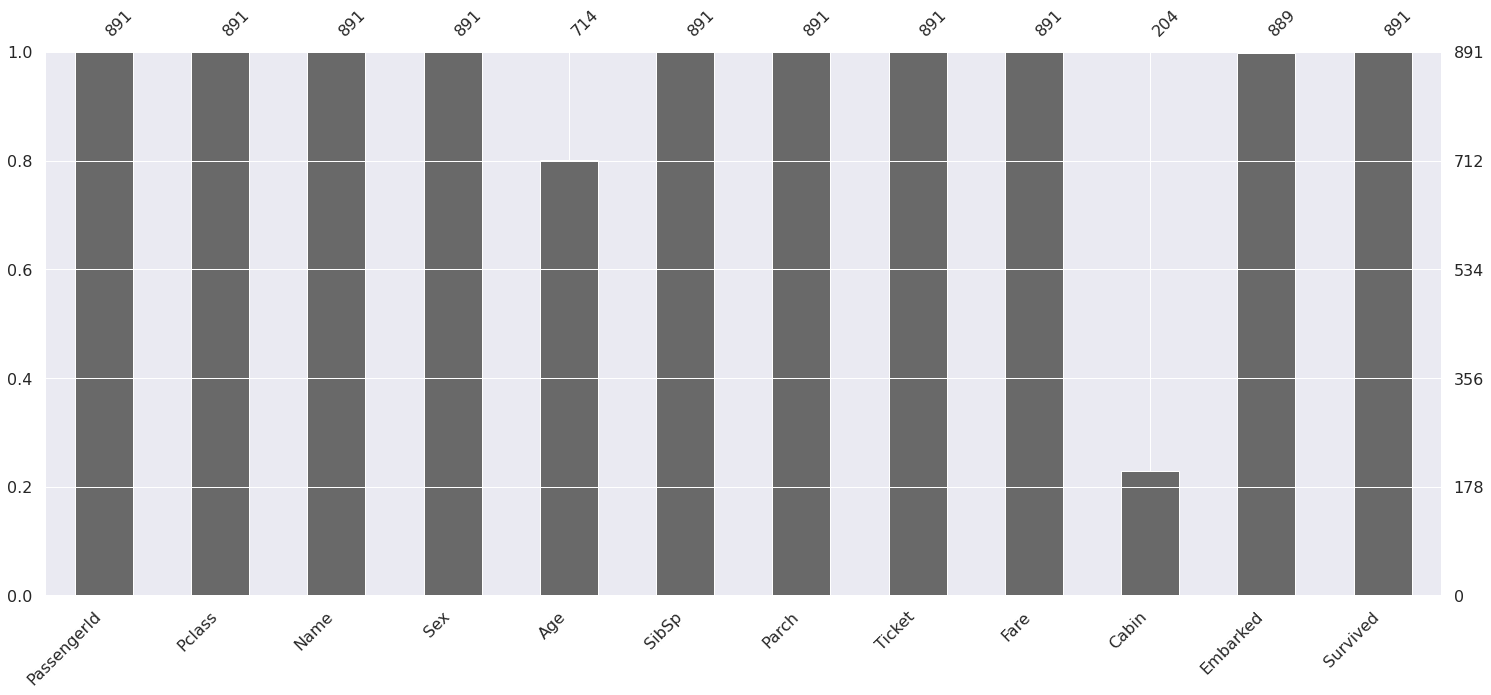

In [0]:
import missingno as msno
#msno.bar는 각 컬럼의 null 이 아닌 데이터의 비율을 그래프로 그려주는 패키지
# df_train.toPandas() : Spark DataFrame인 df_train 을 Pandas DataFrame으로 변환 
msno.bar(df=df_train.toPandas())

In [0]:
#Serviced 컬럼에 저장된 값들의 빈도수 조회
#0 사망자 549명
#1 생존자 342명
df_train.groupBy('Survived').count().show()

+--------+-----+
|Survived|count|
+--------+-----+
|       1|  342|
|       0|  549|
+--------+-----+



In [0]:
#티켓 클래스의 빈도수 조회
df_train.groupBy('Pclass').count().show()

+------+-----+
|Pclass|count|
+------+-----+
|     1|  216|
|     3|  491|
|     2|  184|
+------+-----+



In [0]:
# SQL 사용을 위해서 Spark DataFrame을 View(데이터를 추가 수정 할 수 없는 테이블) 형태로 변환
df_train.createOrReplaceTempView('titanic_view')

In [0]:
%sql

--생존자 Survived=1 인 줄 의 데이터 조회
select * from titanic_view where Survived=1

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 71.2833 C85 C 1 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 7.925 null S 1 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 53.1 C123 S 1 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 11.1333 null S 1 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 30.0708 null C 1 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 16.7 G6 S 1 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 26.55 C103 S 1 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 16.0 null S 1 18 2 Williams, Mr. Charles Eugene male null 0 0 244373 13.0 null S 1 20 3 Masselmani, Mrs. Fatima female null 0 0 2649 7.225 null C 1 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 13.0 D56 S 1 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 8.0292 null Q 1 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 35.5 A6 S 1 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 31.3875 null S 1 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female null 0 0 330959 7.8792 null Q 1 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female null 1 0 PC 17569 146.5208 B78 C 1 33 3 Glynn, Miss. Mary Agatha female null 0 0 335677 7.75 null Q 1 37 3 Mamee, Mr. Hanna male null 0 0 2677 7.2292 null C 1 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 11.2417 null C 1 44 2 Laroche, Miss. Simonne Marie Anne Andree female 3.0 1 2 SC/Paris 2123 41.5792 null C 1 45 3 Devaney, Miss. Margaret Delia female 19.0 0 0 330958 7.8792 null Q 1 48 3 O'Driscoll, Miss. Bridget female null 0 0 14311 7.75 null Q 1 53 1 Harper, Mrs. Henry Sleeper (Myna Haxtun) female 49.0 1 0 PC 17572 76.7292 D33 C 1 54 2 Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson) female 29.0 1 0 2926 26.0 null S 1 56 1 Woolner, Mr. Hugh male null 0 0 19947 35.5 C52 S 1 57 2 Rugg, Miss. Emily female 21.0 0 0 C.A. 31026 10.5 null S 1 59 2 West, Miss. Constance Mirium female 5.0 1 2 C.A. 34651 27.75 null S 1 62 1 Icard, Miss. Amelie female 38.0 0 0 113572 80.0 B28 null 1 66 3 Moubarek, Master. Gerios male null 1 1 2661 15.2458 null C 1 67 2 Nye, Mrs. (Elizabeth Ramell) female 29.0 0 0 C.A. 29395 10.5 F33 S 1 69 3 Andersson, Miss. Erna Alexandra female 17.0 4 2 3101281 7.925 null S 1 75 3 Bing, Mr. Lee male 32.0 0 0 1601 56.4958 null S 1 79 2 Caldwell, Master. Alden Gates male 0.83 0 2 248738 29.0 null S 1 80 3 Dowdell, Miss. Elizabeth female 30.0 0 0 364516 12.475 null S 1 82 3 Sheerlinck, Mr. Jan Baptist male 29.0 0 0 345779 9.5 null S 1 83 3 McDermott, Miss. Brigdet Delia female null 0 0 330932 7.7875 null Q 1 85 2 Ilett, Miss. Bertha female 17.0 0 0 SO/C 14885 10.5 null S 1 86 3 Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson) female 33.0 3 0 3101278 15.85 null S 1 89 1 Fortune, Miss. Mabel Helen female 23.0 3 2 19950 263.0 C23 C25 C27 S 1 98 1 Greenfield, Mr. William Bertram male 23.0 0 1 PC 17759 63.3583 D10 D12 C 1 99 2 Doling, Mrs. John T (Ada Julia Bone) female 34.0 0 1 231919 23.0 null S 1 107 3 Salkjelsvik, Miss. Anna Kristine female 21.0 0 0 343120 7.65 null S 1 108 3 Moss, Mr. Albert Johan male null 0 0 312991 7.775 null S 1 110 3 Moran, Miss. Bertha female null 1 0 371110 24.15 null Q 1 124 2 Webber, Miss. Susan female 32.5 0 0 27267 13.0 E101 S 1 126 3 Nicola-Yarred, Master. Elias male 12.0 1 0 2651 11.2417 null C 1 128 3 Madsen, Mr. Fridtjof Arne male 24.0 0 0 C 17369 7.1417 null S 1 129 3 Peter, Miss. Anna female null 1 1 2668 22.3583 F E69 C 1 134 2 Weisz, Mrs. Leopold (Mathilde Francoise Pede) female 29.0 1 0 228414 26.0 null S 1 137 1 Newsom, Miss. Helen Monypeny female 19.0 0 2 11752 26.2833 D47 S 1 142 3 Nysten, Miss. Anna Sofia female 22.0 0 0 347081 7.75 null S 1 143 3 Hakkarainen, Mrs. Pekka Pietari (Elin Matilda Dolck) female 24.0 1 0 STON/O2. 3101279 15.85 null S 1 147 3 "Andersson, Mr. August Edvar

In [0]:
%sql
--생존자 Survived=1 인 줄 의 PClass  칸 조회
select Pclass from titanic_view where Survived=1

Pclass 1 3 1 3 2 3 1 2 2 3 2 3 1 3 3 1 3 3 3 2 3 3 1 2 1 2 2 1 3 2 3 3 2 3 3 3 2 3 1 1 2 3 3 3 2 3 3 3 2 1 3 3 3 1 3 2 3 1 3 2 3 3 1 2 3 2 1 1 3 3 3 3 1 2 1 3 1 3 1 2 1 3 2 3 2 1 3 1 1 1 2 3 3 1 1 3 2 3 1 3 3 3 2 3 1 1 1 1 3 3 2 1 1 1 1 1 1 3 2 1 1 2 2 1 2 3 1 3 1 1 3 2 1 2 2 3 3 1 3 3 1 3 3 1 1 1 3 1 3 1 2 2 1 3 1 3 2 3 2 1 3 2 2 2 2 3 1 3 2 1 2 2 2 3 1 2 1 3 1 1 3 1 2 1 3 2 2 3 3 1 1 3 1 1 2 1 3 3 1 1 2 2 1 1 2 2 3 2 1 1 1 2 2 2 2 1 3 3 1 1 3 3 2 1 1 3 2 1 3 2 1 1 1 1 2 1 2 1 1 2 1 3 2 2 1 3 1 1 1 2 1 3 3 1 1 3 2 3 1 3 1 2 2 3 1 1 1 1 3 3 3 1 1 2 1 1 3 1 1 1 2 2 1 2 3 1 1 1 1 3 2 2 3 2 2 1 3 1 1 2 3 1 3 1 3 3 1 3 2 1 3 3 1 1 3 3 2 3 1 3 2 1 3 1 1 1 1 3 1 1 3 1 2 2 3 1 2 3 1 2 1 1

In [0]:
%sql
--생존자 Survived=1 인 줄 의 PClass  칸 조회
select Pclass, count(*) from titanic_view where Survived=1 group by Pclass

Pclass count(1) 1 136 3 119 2 87

In [0]:
%sql
-- Pclass, Survived 별 데이터의 수 조회
-- Pclass 의 오름  차순으로 정렬 같은 Pclass 안에서는 Survived 컬럼의 내림차순 정렬
select Pclass, Survived, count(*) from titanic_view group by   Pclass, Survived order by Pclass, Survived Desc

Pclass Survived count(1) 1 1 136 1 0 80 2 1 87 2 0 97 3 1 119 3 0 372

In [0]:
#Pclass칸과 Survived칸을 교차해서 빈도수를 출력
df_train.crosstab('Pclass','Survived').show()

+---------------+---+---+
|Pclass_Survived|  0|  1|
+---------------+---+---+
|              1| 80|136|
|              3|372|119|
|              2| 97| 87|
+---------------+---+---+



In [0]:
%sql
-- Sex, Survived 별 데이터의 수 조회
-- Sex 의 오름  차순으로 정렬 같은 Sex 안에서는 Survived 컬럼의 내림차순 정렬
select Sex, Survived, count(*) from titanic_view group by   Sex, Survived order by Sex, Survived Desc

Sex Survived count(1) female 1 233 female 0 81 male 1 109 male 0 468

In [0]:
#Sex 과 Survived칸을 교차해서 빈도수를 출력
df_train.crosstab('Sex','Survived').show()

+------------+---+---+
|Sex_Survived|  0|  1|
+------------+---+---+
|        male|468|109|
|      female| 81|233|
+------------+---+---+



Out[46]: <seaborn.axisgrid.FacetGrid at 0x7fe85424cc10>

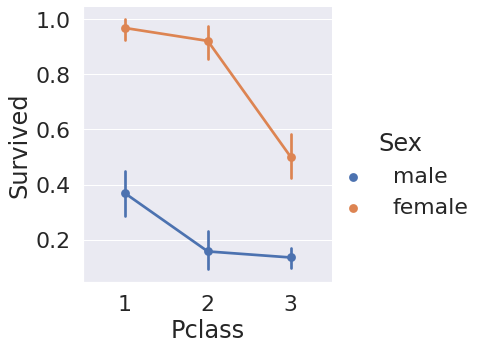

In [0]:
# df_train.toPandas() : Spark DataFrame인 df_train 을 Pandas DataFrame으로 변환 
#각 성별별로 Pclass컬럼과 Survived컬럼을 교차해서 그래프를 그림
#sns.factorplot(컬럼1, 컬럼2, hue=범주에사용할 컬럼, data=데이터프레임)

sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train.toPandas())

In [0]:
#df_train['Survived'] == 1] 인 행 대입 
df_train.filter(df_train["Survived"] == 1).show()

+-----------+------+--------------------+------+----+-----+-----+----------------+--------+-----+--------+--------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|    Fare|Cabin|Embarked|Survived|
+-----------+------+--------------------+------+----+-----+-----+----------------+--------+-----+--------+--------+
|          2|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599| 71.2833|  C85|       C|       1|
|          3|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|   7.925| null|       S|       1|
|          4|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|    53.1| C123|       S|       1|
|          9|     3|Johnson, Mrs. Osc...|female|27.0|    0|    2|          347742| 11.1333| null|       S|       1|
|         10|     2|Nasser, Mrs. Nich...|female|14.0|    1|    0|          237736| 30.0708| null|       C|       1|
|         11|     3|Sandstrom, Miss. ...|female| 4.0|    1|    1|       

In [0]:
#df_train['Age'] 컬럼에서 df_train['Survived'] == 1] 인 행 조회
df_train[["Age"]].filter(df_train["Survived"] == 1).show()

+----+
| Age|
+----+
|38.0|
|26.0|
|35.0|
|27.0|
|14.0|
| 4.0|
|58.0|
|55.0|
|null|
|null|
|34.0|
|15.0|
|28.0|
|38.0|
|null|
|null|
|null|
|null|
|14.0|
| 3.0|
+----+
only showing top 20 rows



In [0]:
#df_train['Age'] 컬럼에서 [df_train['Survived'] == 0 인 행 조회
df_train[["Age"]].filter(df_train["Survived"] == 0).show()


+----+
| Age|
+----+
|22.0|
|35.0|
|null|
|54.0|
| 2.0|
|20.0|
|39.0|
|14.0|
| 2.0|
|31.0|
|35.0|
| 8.0|
|null|
|19.0|
|null|
|40.0|
|66.0|
|28.0|
|42.0|
|21.0|
+----+
only showing top 20 rows



Out[50]: <matplotlib.legend.Legend at 0x7fe8541b1250>

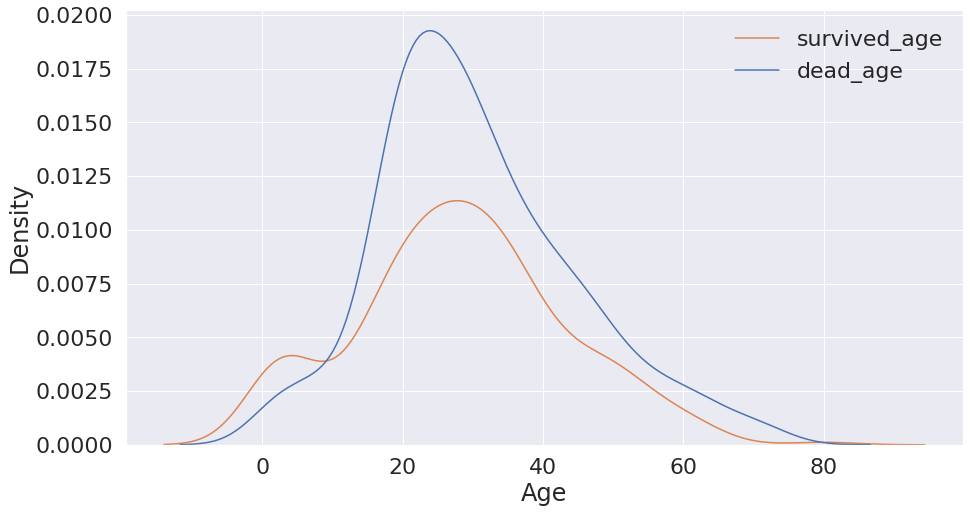

In [0]:
#Age컬럼에서 각 나이별 사망자 생존자 비율을 그래프로 그림

#그래프의 크기 설정 가로15 세로8
plt.figure(figsize=(15,8))
#sns.kdeplot 는 비율을 그래프로 그려줌
sns.kdeplot(data=df_train.toPandas() , x="Age", hue="Survived")
#범례를 설정
plt.legend(['survived_age', 'dead_age'])

In [0]:
%sql
-- Embarked, Survived 별 데이터의 수 조회
-- Embarked 의 오름 차순으로 정렬하고 같은 Embarked안에서는 Survived 컬럼의 내림차순 정렬
select Embarked, Survived, count(*) 
from titanic_view 
group by  Embarked, Survived 
order by Embarked, Survived Desc

Embarked Survived count(1) null 1 2 C 1 93 C 0 75 Q 1 30 Q 0 47 S 1 217 S 0 427

In [0]:
#Embarked컬럼과 Survived컬럼을 교차해서 빈도수 조회

df_train.crosstab('Embarked', 'Survived').show()

+-----------------+---+---+
|Embarked_Survived|  0|  1|
+-----------------+---+---+
|             null|  0|  2|
|                Q| 47| 30|
|                S|427|217|
|                C| 75| 93|
+-----------------+---+---+



In [0]:
##Embarked컬럼과 Pclass컬럼을 교차해서 빈도수 조회

df_train.crosstab('Embarked', 'Pclass').show()

+---------------+---+---+---+
|Embarked_Pclass|  1|  2|  3|
+---------------+---+---+---+
|              S|127|164|353|
|              Q|  2|  3| 72|
|              C| 85| 17| 66|
|           null|  2|  0|  0|
+---------------+---+---+---+



In [0]:
#Pclass컬럼과 Survived 컬럼의 연관 관계
df_train.corr("Pclass","Survived")

Out[54]: -0.33848103596101514

In [0]:
#컬럼타입 df_train.schema 을 순서대로 column에 대입
for column in df_train.schema :
    #컬럼명 조회
    print("column.name = ", column.name)
    #컬럼 타입 조회
    print("column.dataType = ", column.dataType)
    print("=" * 100)

column.name =  PassengerId
column.dataType =  StringType
column.name =  Pclass
column.dataType =  IntegerType
column.name =  Name
column.dataType =  StringType
column.name =  Sex
column.dataType =  StringType
column.name =  Age
column.dataType =  DoubleType
column.name =  SibSp
column.dataType =  IntegerType
column.name =  Parch
column.dataType =  IntegerType
column.name =  Ticket
column.dataType =  StringType
column.name =  Fare
column.dataType =  DoubleType
column.name =  Cabin
column.dataType =  StringType
column.name =  Embarked
column.dataType =  StringType
column.name =  Survived
column.dataType =  IntegerType


In [0]:
#컬럼타입 df_train.schema 을 순서대로 column에 대입
for column in df_train.schema :
    #컬럼명 조회
    print("column.name = ", column.name)
    #컬럼 타입 조회
    print("column.dataType = ", column.dataType)
    
    #컬럼 타입이 IntegerType() : 정수
    # 컬럼 타입이 DoubleType() : 실수 이면
    if (column.dataType == IntegerType()) or (column.dataType==DoubleType()):
        print("numeric type")
        
    print("=" * 100)


column.name =  PassengerId
column.dataType =  StringType
column.name =  Pclass
column.dataType =  IntegerType
numeric type
column.name =  Name
column.dataType =  StringType
column.name =  Sex
column.dataType =  StringType
column.name =  Age
column.dataType =  DoubleType
numeric type
column.name =  SibSp
column.dataType =  IntegerType
numeric type
column.name =  Parch
column.dataType =  IntegerType
numeric type
column.name =  Ticket
column.dataType =  StringType
column.name =  Fare
column.dataType =  DoubleType
numeric type
column.name =  Cabin
column.dataType =  StringType
column.name =  Embarked
column.dataType =  StringType
column.name =  Survived
column.dataType =  IntegerType
numeric type


In [0]:
#정수 타입 혹은 실수 타입 컬럼의 이름을 저장할 리스트
numeric_column_list=[]

#컬럼타입 df_train.schema 을 순서대로 column에 대입
for column in df_train.schema :
    #컬럼명 조회
    print("column.name = ", column.name)
    #컬럼 타입 조회
    print("column.dataType = ", column.dataType)
    
    #컬럼 타입이 IntegerType() : 정수
    # 컬럼 타입이 DoubleType() : 실수 이면
    if (column.dataType == IntegerType()) or (column.dataType==DoubleType()):
        print("numeric type")
        #컬럼의 이름을 numeric_column_list에 저장
        numeric_column_list.append(column.name)
        
    print("=" * 100)

column.name =  PassengerId
column.dataType =  StringType
column.name =  Pclass
column.dataType =  IntegerType
numeric type
column.name =  Name
column.dataType =  StringType
column.name =  Sex
column.dataType =  StringType
column.name =  Age
column.dataType =  DoubleType
numeric type
column.name =  SibSp
column.dataType =  IntegerType
numeric type
column.name =  Parch
column.dataType =  IntegerType
numeric type
column.name =  Ticket
column.dataType =  StringType
column.name =  Fare
column.dataType =  DoubleType
numeric type
column.name =  Cabin
column.dataType =  StringType
column.name =  Embarked
column.dataType =  StringType
column.name =  Survived
column.dataType =  IntegerType
numeric type


In [0]:
#정수 타입 혹은 실수 타입 컬럼의 이름 조회
numeric_column_list

Out[58]: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

In [0]:
#numeric_column_list : 정수 타입 혹은 실수 타입 컬럼의 이름

for column_name in numeric_column_list:
    #컬럼 이름 조회
    print("column_name =", column_name)
    print("="*100)

column_name = Pclass
column_name = Age
column_name = SibSp
column_name = Parch
column_name = Fare
column_name = Survived


In [0]:
#numeric_column_list : 정수 타입 혹은 실수 타입 컬럼의 이름

for column_name in numeric_column_list:
    #컬럼 이름 조회
    print("column_name =", column_name)
    
    #column_name 컬럼과 Survived 컬럼의 연관 관계
    print( df_train.corr(column_name,"Survived") )
    print("="*100)

column_name = Pclass
-0.33848103596101514
column_name = Age
0.010539215871285685
column_name = SibSp
-0.03532249888573558
column_name = Parch
0.08162940708348336
column_name = Fare
0.2573065223849626
column_name = Survived
1.0


In [0]:
#df_train 를 Pandas DataFrame으로 변환해서 psample_df에 대입
psample_df = df_train.toPandas()

In [0]:
psample_df

PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 Survived 
 
 
 
 
 0 
 1 
 3 
 Braund, Mr. Owen Harris 
 male 
 22.0 
 1 
 0 
 A/5 21171 
 7.2500 
 None 
 S 
 0 
 
 
 1 
 2 
 1 
 Cumings, Mrs. John Bradley (Florence Briggs Th... 
 female 
 38.0 
 1 
 0 
 PC 17599 
 71.2833 
 C85 
 C 
 1 
 
 
 2 
 3 
 3 
 Heikkinen, Miss. Laina 
 female 
 26.0 
 0 
 0 
 STON/O2. 3101282 
 7.9250 
 None 
 S 
 1 
 
 
 3 
 4 
 1 
 Futrelle, Mrs. Jacques Heath (Lily May Peel) 
 female 
 35.0 
 1 
 0 
 113803 
 53.1000 
 C123 
 S 
 1 
 
 
 4 
 5 
 3 
 Allen, Mr. William Henry 
 male 
 35.0 
 0 
 0 
 373450 
 8.0500 
 None 
 S 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 886 
 887 
 2 
 Montvila, Rev. Juozas 
 male 
 27.0 
 0 
 0 
 211536 
 13.0000 
 None 
 S 
 0 
 
 
 887 
 888 
 1 
 Graham, Miss. Margaret Edith 
 female 
 19.0 
 0 
 0 
 112053 
 30.0000 
 B42 
 S 
 1 
 
 
 888 
 889 
 3 
 "Johnston, Miss. Catherine Helen ""Carrie""" 
 female 
 NaN 
 1 
 2 
 W./C. 6607 
 23.4500 
 None 
 S 
 0 
 
 
 889 
 890 
 1 
 Behr, Mr. Karl Howell 
 male 
 26.0 
 0 
 0 
 111369 
 30.0000 
 C148 
 C 
 1 
 
 
 890 
 891 
 3 
 Dooley, Mr. Patrick 
 male 
 32.0 
 0 
 0 
 370376 
 7.7500 
 None 
 Q 
 0 
 
 
 
 891 rows × 12 columns

In [0]:
# skew() : 컬럼의 기울임 조회
psample_df.skew()

Out[63]: PassengerId    0.000000
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Survived       0.478523
dtype: float64

Out[64]: (array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

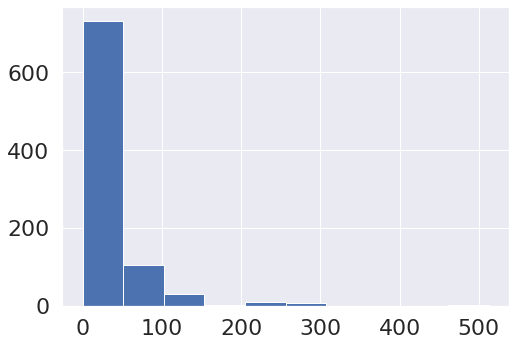

In [0]:
#가장 기울어진 컬럼 시각화
plt.hist(psample_df["Fare"])

In [0]:
df_train["Fare"]

Out[65]: Column<'Fare'>

In [0]:
from pyspark.sql.functions import log1p

# df_train.withColumn(수정할 컬럼의 이름, 수정할 값)

#df_train.withColumn(Fare : Fare 컬럼의 값 수정

# log1p("Fare") : Fare에 log(1+데이터) 를 곱한 값을 리턴하는 log1p 호출해서 컬럼갑 수정

df_train = df_train.withColumn("Fare", log1p("Fare"))

In [0]:
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 6 3 Moran, Mr. James male null 0 0 330877 2.246892662898172 null Q 0 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 18 2 Williams, Mr. Charles Eugene male null 0 0 244373 2.639057329615259 null S 1 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 20 3 Masselmani, Mrs. Fatima female null 0 0 2649 2.1071782966514356 null C 1 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 27 3 Emir, Mr. Farred Chehab male null 0 0 2631 2.1071782966514356 null C 0 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female null 0 0 330959 2.1837114628556327 null Q 1 30 3 Todoroff, Mr. Lalio male null 0 0 349216 2.1855792552411137 null S 0 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female null 1 0 PC 17569 4.993969182787072 B78 C 1 33 3 Glynn, Miss. Mary Agatha female null 0 0 335677 2.169053700369523 null Q 1 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 37 3 Mamee, Mr. Hanna male null 0 0 2677 2.1076888046179385 null C 1 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40.0 1 0 7546 2.3489914658082016 null S 0 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27.0 1 0 11668 3.091042453358316 null S 0 43 3 Kraeff, Mr. Theodor male null 0 0 349253 2.1855792552411137 null C 0 44 2 Laroche, Miss. Simonne Marie Anne Andree female 3.0 1 2 SC/Paris 2123 3.7513658711253766 null C 1 45 3 Devaney, Miss. Margaret Delia female 19.0 0 0 330958 2.1837114628556327 null Q 1 46 3 Rogers, Mr. William John male null 0

In [0]:
#sample_df를 Pandas DataFrame으로 변환해서 psample_df에 대입
psample_df = df_train.toPandas()

In [0]:
psample_df

PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 Survived 
 
 
 
 
 0 
 1 
 3 
 Braund, Mr. Owen Harris 
 male 
 22.0 
 1 
 0 
 A/5 21171 
 2.110213 
 None 
 S 
 0 
 
 
 1 
 2 
 1 
 Cumings, Mrs. John Bradley (Florence Briggs Th... 
 female 
 38.0 
 1 
 0 
 PC 17599 
 4.280593 
 C85 
 C 
 1 
 
 
 2 
 3 
 3 
 Heikkinen, Miss. Laina 
 female 
 26.0 
 0 
 0 
 STON/O2. 3101282 
 2.188856 
 None 
 S 
 1 
 
 
 3 
 4 
 1 
 Futrelle, Mrs. Jacques Heath (Lily May Peel) 
 female 
 35.0 
 1 
 0 
 113803 
 3.990834 
 C123 
 S 
 1 
 
 
 4 
 5 
 3 
 Allen, Mr. William Henry 
 male 
 35.0 
 0 
 0 
 373450 
 2.202765 
 None 
 S 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 886 
 887 
 2 
 Montvila, Rev. Juozas 
 male 
 27.0 
 0 
 0 
 211536 
 2.639057 
 None 
 S 
 0 
 
 
 887 
 888 
 1 
 Graham, Miss. Margaret Edith 
 female 
 19.0 
 0 
 0 
 112053 
 3.433987 
 B42 
 S 
 1 
 
 
 888 
 889 
 3 
 "Johnston, Miss. Catherine Helen ""Carrie""" 
 female 
 NaN 
 1 
 2 
 W./C. 6607 
 3.196630 
 None 
 S 
 0 
 
 
 889 
 890 
 1 
 Behr, Mr. Karl Howell 
 male 
 26.0 
 0 
 0 
 111369 
 3.433987 
 C148 
 C 
 1 
 
 
 890 
 891 
 3 
 Dooley, Mr. Patrick 
 male 
 32.0 
 0 
 0 
 370376 
 2.169054 
 None 
 Q 
 0 
 
 
 
 891 rows × 12 columns

In [0]:
# skew() : 컬럼의 기울임 조회
psample_df.skew()

Out[70]: PassengerId    0.000000
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           0.394928
Survived       0.478523
dtype: float64

Out[167]: (array([ 15.,   0.,   2., 350., 167., 182.,  85.,  59.,  28.,   3.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <BarContainer object of 10 artists>)

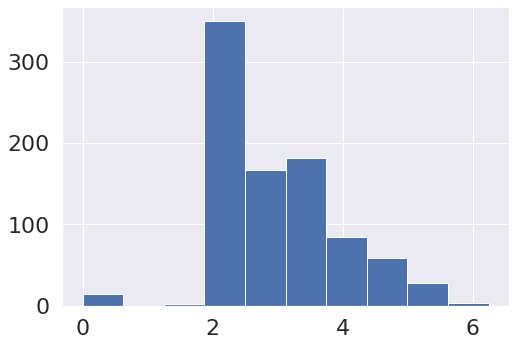

In [0]:
plt.hist(psample_df["Fare"])

In [0]:
#배우자 수와 부모 아이수를 합해서 FamilySize컬럼 생성

# df_train.withColumn(수정할 컬럼의 이름, 수정할 값)

# df_train.withColumn("FamilySize" : FamilySize 컬럼이 있으면 수정 없으면 추가

# df_train["SibSp"] : 배우자  수
# df_train["Parch"] : 동승한 부모 자식의 수

# df_train["SibSp"] + df_train["Parch"] + 1 : 컬럼값을 배우자 수와 부모 아이수 + 1로 수정
df_train.withColumn("FamilySize", df_train["SibSp"] + df_train["Parch"] + 1).show()

+-----------+------+--------------------+------+----+-----+-----+----------------+------------------+-----+--------+--------+----------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|              Fare|Cabin|Embarked|Survived|FamilySize|
+-----------+------+--------------------+------+----+-----+-----+----------------+------------------+-----+--------+--------+----------+
|          1|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|2.1102132003465894| null|       S|       0|         2|
|          2|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|   4.2805931204649|  C85|       C|       1|         2|
|          3|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282| 2.188856327665703| null|       S|       1|         1|
|          4|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|3.9908341858524357| C123|       S|       1|         2|
|          5|     3|Allen, Mr. Willia...|

In [0]:
#배우자 수와 부모 아이수를 합해서 FamilySize컬럼 생성해서 df_train에 대입

# df_train.withColumn(수정할 컬럼의 이름, 수정할 값)

# df_train.withColumn("FamilySize" : FamilySize 컬럼이 있으면 수정 없으면 추가

# df_train["SibSp"] : 배우자  수
# df_train["Parch"] : 동승한 부모 자식의 수

# df_train["SibSp"] + df_train["Parch"] + 1 : 컬럼값을 배우자 수와 부모 아이수 + 1로 수정
df_train = df_train.withColumn("FamilySize", df_train["SibSp"] + df_train["Parch"] + 1)

In [0]:
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 6 3 Moran, Mr. James male null 0 0 330877 2.246892662898172 null Q 0 1 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 18 2 Williams, Mr. Charles Eugene male null 0 0 244373 2.639057329615259 null S 1 1 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 20 3 Masselmani, Mrs. Fatima female null 0 0 2649 2.1071782966514356 null C 1 1 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 27 3 Emir, Mr. Farred Chehab male null 0 0 2631 2.1071782966514356 null C 0 1 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female null 0 0 330959 2.1837114628556327 null Q 1 1 30 3 Todoroff, Mr. Lalio male null 0 0 349216 2.1855792552411137 null S 0 1 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female null 1 0 PC 17569 4.993969182787072 B78 C 1 2 33 3 Glynn, Miss. Mary Agatha female null 0 0 335677 2.169053700369523 null Q 1 1 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 37 3 Mamee, Mr. Hanna male null 0 0 2677 2.1076888046179385 null C 1 1 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 3 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 2 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40.0 1 0 7546 2.3489914658082016 null S 0 2 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27.0 1 0 11668 3.091042453358316 null S 0 2 43 3 Kraeff, Mr. Theodor male null 0 0 349253 2.1855792552411137 null C 0 1 44 2 Laroche, Miss. Simonne Marie Anne Andree female 3.0 1 2 SC/Paris 2123 3.7513658711253766 null C 1 4 45 3 Devaney, Miss. Margaret

In [0]:
#FamilySize 과 Survived칸을 교차해서 빈도수를 출력
#df_train.crosstab(컬럼1,컬럼2)

df_train.crosstab('FamilySize', 'Survived').show()

+-------------------+---+---+
|FamilySize_Survived|  0|  1|
+-------------------+---+---+
|                  5| 12|  3|
|                  1|374|163|
|                  6| 19|  3|
|                  2| 72| 89|
|                  7|  8|  4|
|                  3| 43| 59|
|                 11|  7|  0|
|                  8|  6|  0|
|                  4|  8| 21|
+-------------------+---+---+



In [0]:
%sql

-- 새로 추가된 컬럼이 titanic_view에 적용이 않되있음
select * from titanic_view


PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 7.25 null S 0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 71.2833 C85 C 1 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 7.925 null S 1 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 53.1 C123 S 1 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 8.05 null S 0 6 3 Moran, Mr. James male null 0 0 330877 8.4583 null Q 0 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 51.8625 E46 S 0 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 21.075 null S 0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 11.1333 null S 1 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 30.0708 null C 1 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 16.7 G6 S 1 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 26.55 C103 S 1 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 8.05 null S 0 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 31.275 null S 0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 7.8542 null S 0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 16.0 null S 1 17 3 Rice, Master. Eugene male 2.0 4 1 382652 29.125 null Q 0 18 2 Williams, Mr. Charles Eugene male null 0 0 244373 13.0 null S 1 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 18.0 null S 0 20 3 Masselmani, Mrs. Fatima female null 0 0 2649 7.225 null C 1 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 26.0 null S 0 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 13.0 D56 S 1 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 8.0292 null Q 1 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 35.5 A6 S 1 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 21.075 null S 0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 31.3875 null S 1 27 3 Emir, Mr. Farred Chehab male null 0 0 2631 7.225 null C 0 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 263.0 C23 C25 C27 S 0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female null 0 0 330959 7.8792 null Q 1 30 3 Todoroff, Mr. Lalio male null 0 0 349216 7.8958 null S 0 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 27.7208 null C 0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female null 1 0 PC 17569 146.5208 B78 C 1 33 3 Glynn, Miss. Mary Agatha female null 0 0 335677 7.75 null Q 1 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 10.5 null S 0 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 82.1708 null C 0 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 52.0 null S 0 37 3 Mamee, Mr. Hanna male null 0 0 2677 7.2292 null C 1 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 8.05 null S 0 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 18.0 null S 0 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 11.2417 null C 1 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40.0 1 0 7546 9.475 null S 0 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27.0 1 0 11668 21.0 null S 0 43 3 Kraeff, Mr. Theodor male null 0 0 349253 7.8958 null C 0 44 2 Laroche, Miss. Simonne Marie Anne Andree female 3.0 1 2 SC/Paris 2123 41.5792 null C 1 45 3 Devaney, Miss. Margaret Delia female 19.0 0 0 330958 7.8792 null Q 1 46 3 Rogers, Mr. William John male null 0 0 S.C./A.4. 23567 8.05 null S 0 47 3 Lennon, Mr. Denis male null 1 0 370371 15.5 null Q 0 48 3 O'Driscoll, Miss. Bridget female null 0 0 14311 7.75 null Q 1 49 3 Samaan, Mr. Youssef male null 2 0 2662 21.6792 null C 0 50 3 Arnold-Franchi, Mrs. Josef (Josefine Franchi) female 18.0 1 0 349237 17.8 null S 0 51 3 Panula, Master. Juha Niilo male 7.0 4 1 3101295 39.6875 null S 0 52 3 Nosworthy, Mr. Richard Cater male 21.0 0 0 A/4. 39886 7.8 null S 0 53 1 Harper, Mrs. Henry Sleeper (Myna Haxtun) female 49.0 1 0 PC 17572 76.7292 D33 C 1 54 2 Fa

In [0]:
# 컬럼이 추가 되었으므로 Spark DataFrame을 View(데이터를 추가 수정 할 수 없는 테이블) 
# 형태로 다시 변환
df_train.createOrReplaceTempView('titanic_view')

In [0]:
%sql
-- 새로 추가된 컬럼 FamilySize가  titanic_view에 추가 되었음
select * from titanic_view

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 6 3 Moran, Mr. James male null 0 0 330877 2.246892662898172 null Q 0 1 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 18 2 Williams, Mr. Charles Eugene male null 0 0 244373 2.639057329615259 null S 1 1 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 20 3 Masselmani, Mrs. Fatima female null 0 0 2649 2.1071782966514356 null C 1 1 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 27 3 Emir, Mr. Farred Chehab male null 0 0 2631 2.1071782966514356 null C 0 1 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female null 0 0 330959 2.1837114628556327 null Q 1 1 30 3 Todoroff, Mr. Lalio male null 0 0 349216 2.1855792552411137 null S 0 1 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female null 1 0 PC 17569 4.993969182787072 B78 C 1 2 33 3 Glynn, Miss. Mary Agatha female null 0 0 335677 2.169053700369523 null Q 1 1 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 37 3 Mamee, Mr. Hanna male null 0 0 2677 2.1076888046179385 null C 1 1 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 3 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 2 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40.0 1 0 7546 2.3489914658082016 null S 0 2 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27.0 1 0 11668 3.091042453358316 null S 0 2 43 3 Kraeff, Mr. Theodor male null 0 0 349253 2.1855792552411137 null C 0 1 44 2 Laroche, Miss. Simonne Marie Anne Andree female 3.0 1 2 SC/Paris 2123 3.7513658711253766 null C 1 4 45 3 Devaney, Miss. Margaret

In [0]:
%sql
-- FamilySize, Survived 별 데이터의 수 조회
-- FamilySize 의 오름 차순으로 정렬하고 같은 Family안에서는 Survived 컬럼의 내림차순 정렬
select FamilySize, Survived, count(*) 
from titanic_view group by  
FamilySize, Survived 
order by FamilySize, Survived Desc

FamilySize Survived count(1) 1 1 163 1 0 374 2 1 89 2 0 72 3 1 59 3 0 43 4 1 21 4 0 8 5 1 3 5 0 12 6 1 3 6 0 19 7 1 4 7 0 8 8 0 6 11 0 7

In [0]:
%sql
-- Name 컬럼 조회
select Name from titanic_view

Name Braund, Mr. Owen Harris Cumings, Mrs. John Bradley (Florence Briggs Thayer) Heikkinen, Miss. Laina Futrelle, Mrs. Jacques Heath (Lily May Peel) Allen, Mr. William Henry Moran, Mr. James McCarthy, Mr. Timothy J Palsson, Master. Gosta Leonard Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) Nasser, Mrs. Nicholas (Adele Achem) Sandstrom, Miss. Marguerite Rut Bonnell, Miss. Elizabeth Saundercock, Mr. William Henry Andersson, Mr. Anders Johan Vestrom, Miss. Hulda Amanda Adolfina Hewlett, Mrs. (Mary D Kingcome) Rice, Master. Eugene Williams, Mr. Charles Eugene Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) Masselmani, Mrs. Fatima Fynney, Mr. Joseph J Beesley, Mr. Lawrence "McGowan, Miss. Anna ""Annie""" Sloper, Mr. William Thompson Palsson, Miss. Torborg Danira Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) Emir, Mr. Farred Chehab Fortune, Mr. Charles Alexander "O'Dwyer, Miss. Ellen ""Nellie""" Todoroff, Mr. Lalio Uruchurtu, Don. Manuel E Spencer, Mrs. William Augustus (Marie Eugenie) Glynn, Miss. Mary Agatha Wheadon, Mr. Edward H Meyer, Mr. Edgar Joseph Holverson, Mr. Alexander Oskar Mamee, Mr. Hanna Cann, Mr. Ernest Charles Vander Planke, Miss. Augusta Maria Nicola-Yarred, Miss. Jamila Ahlin, Mrs. Johan (Johanna Persdotter Larsson) Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) Kraeff, Mr. Theodor Laroche, Miss. Simonne Marie Anne Andree Devaney, Miss. Margaret Delia Rogers, Mr. William John Lennon, Mr. Denis O'Driscoll, Miss. Bridget Samaan, Mr. Youssef Arnold-Franchi, Mrs. Josef (Josefine Franchi) Panula, Master. Juha Niilo Nosworthy, Mr. Richard Cater Harper, Mrs. Henry Sleeper (Myna Haxtun) Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson) Ostby, Mr. Engelhart Cornelius Woolner, Mr. Hugh Rugg, Miss. Emily Novel, Mr. Mansouer West, Miss. Constance Mirium Goodwin, Master. William Frederick Sirayanian, Mr. Orsen Icard, Miss. Amelie Harris, Mr. Henry Birkhardt Skoog, Master. Harald Stewart, Mr. Albert A Moubarek, Master. Gerios Nye, Mrs. (Elizabeth Ramell) Crease, Mr. Ernest James Andersson, Miss. Erna Alexandra Kink, Mr. Vincenz Jenkin, Mr. Stephen Curnow Goodwin, Miss. Lillian Amy Hood, Mr. Ambrose Jr Chronopoulos, Mr. Apostolos Bing, Mr. Lee Moen, Mr. Sigurd Hansen Staneff, Mr. Ivan Moutal, Mr. Rahamin Haim Caldwell, Master. Alden Gates Dowdell, Miss. Elizabeth Waelens, Mr. Achille Sheerlinck, Mr. Jan Baptist McDermott, Miss. Brigdet Delia Carrau, Mr. Francisco M Ilett, Miss. Bertha Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson) Ford, Mr. William Neal Slocovski, Mr. Selman Francis Fortune, Miss. Mabel Helen Celotti, Mr. Francesco Christmann, Mr. Emil Andreasson, Mr. Paul Edvin Chaffee, Mr. Herbert Fuller Dean, Mr. Bertram Frank Coxon, Mr. Daniel Shorney, Mr. Charles Joseph Goldschmidt, Mr. George B Greenfield, Mr. William Bertram Doling, Mrs. John T (Ada Julia Bone) Kantor, Mr. Sinai Petranec, Miss. Matilda "Petroff, Mr. Pastcho (""Pentcho"")" White, Mr. Richard Frasar Johansson, Mr. Gustaf Joel Gustafsson, Mr. Anders Vilhelm Mionoff, Mr. Stoytcho Salkjelsvik, Miss. Anna Kristine Moss, Mr. Albert Johan Rekic, Mr. Tido Moran, Miss. Bertha Porter, Mr. Walter Chamberlain Zabour, Miss. Hileni Barton, Mr. David John Jussila, Miss. Katriina Attalah, Miss. Malake Pekoniemi, Mr. Edvard Connors, Mr. Patrick Turpin, Mr. William John Robert Baxter, Mr. Quigg Edmond Andersson, Miss. Ellis Anna Maria Hickman, Mr. Stanley George Moore, Mr. Leonard Charles Nasser, Mr. Nicholas Webber, Miss. Susan White, Mr. Percival Wayland Nicola-Yarred, Master. Elias McMahon, Mr. Martin Madsen, Mr. Fridtjof Arne Peter, Miss. Anna Ekstrom, Mr. Johan Drazenoic, Mr. Jozef Coelho, Mr. Domingos Fernandeo Robins, Mrs. Alexander A (Grace Charity Laury) Weisz, Mrs. Leopold (Mathilde Francoise Pede) Sobey, Mr. Samuel James Hayden Richard, Mr. Emile Newsom, Miss. Helen Monypeny Futrelle, Mr. Jacques Heath Osen, Mr. Olaf Elon Giglio, Mr. Victor Boulos, Mrs. Joseph (Sultana) Nysten, Miss. Anna Sofia Hakkarainen, Mrs. Pekka 

In [0]:
import re
#다음 단어중 하나를 포함하는 문자열을 찾기 위한 객체 p 생성
p = re.compile("Mrs|Mr|Miss|Master|Don|Dr|Ms|Major|Mlle|Mme|Countess|Lady|Don|Countess")

In [0]:
#이름에서 Mr Mrs Miss 를 리턴하는 함수

#매개변수 name_row : Name 컬럼의 이름 하나씩 순서대로 대입되는 매개변수

def get_sir(name_row):
    if p.search(name_row)!=None:
        #검색한 문자열이 'Countess',"Lady" 중 하나를 포함
        if p.search(name_row)[0] in ['Countess',"Lady"]:
            #Mrs를 리턴
            return "Mrs"
         #검색한 문자열이 '"Mme","Ms","Mlle" 중 하나를 포함    
        elif p.search(name_row)[0] in ["Mme","Ms","Mlle"]:
            #Miss를 리턴
            return "Miss" 
        #검색한  문자열이 '"Don","Dr","Major"중 하나를 포함    
        elif p.search(name_row)[0] in ["Don","Dr","Major"]: 
            #Mr 리턴
            return "Mr"
        else:
            #문자열을 리턴
            return p.search(name_row)[0]
    else:
        #Other를 리턴
        return "Other"

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

In [0]:
# get_sir 함수를 Spark DataFrame의 컬럼 값들을 수정해서 리턴 할 수 있는 함수로 변환
# udf(lambda 컬럼의 데이터 하나씩 저장할 변수: 함수명, 리턴받을 결과의타입)

udf_get_sir= udf(lambda x:get_sir(x), StringType() )

In [0]:
# df_train.withColumn(수정할 컬럼의 이름, 수정할 값)

#udf_get_sir 함수를 이용해서 Sir 컬럼 추가

#df_train.withColumn("Sir" : Sir 컬럼이 존재하면 Sir 컬럼 값 수정 없으면 추가

# df_train["Name"] : df_train에서 Name 컬럼 리턴

#udf_get_sir(df_train["Name"] )) : udf_get_sir 함수를 호출해서 이름에서 Mr Miss Mrs Master 추출
df_train.withColumn("Sir",udf_get_sir(df_train["Name"])).show()

+-----------+------+--------------------+------+----+-----+-----+----------------+------------------+-----+--------+--------+----------+------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|              Fare|Cabin|Embarked|Survived|FamilySize|   Sir|
+-----------+------+--------------------+------+----+-----+-----+----------------+------------------+-----+--------+--------+----------+------+
|          1|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|2.1102132003465894| null|       S|       0|         2|    Mr|
|          2|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|   4.2805931204649|  C85|       C|       1|         2|   Mrs|
|          3|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282| 2.188856327665703| null|       S|       1|         1|  Miss|
|          4|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|3.9908341858524357| C123|       S|       1|         2|

In [0]:
# 이름에서 Mr Miss Mrs Master 를 추출해서 df_train에 대입

# df_train.withColumn(수정할 컬럼의 이름, 수정할 값)

#udf_get_sir 함수를 이용해서 Sir 컬럼 추가

#df_train.withColumn("Sir" : Sir 컬럼이 존재하면 Sir 컬럼 값 수정 없으면 추가

# df_train["Name"] : df_train에서 Name 컬럼 리턴

#udf_get_sir(df_train["Name"] )) : udf_get_sir 함수를 호출해서 이름에서 Mr Miss Mrs Master 추출
df_train = df_train.withColumn("Sir",udf_get_sir(df_train["Name"]))

In [0]:
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 6 3 Moran, Mr. James male null 0 0 330877 2.246892662898172 null Q 0 1 Mr 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 18 2 Williams, Mr. Charles Eugene male null 0 0 244373 2.639057329615259 null S 1 1 Mr 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 20 3 Masselmani, Mrs. Fatima female null 0 0 2649 2.1071782966514356 null C 1 1 Mrs 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 27 3 Emir, Mr. Farred Chehab male null 0 0 2631 2.1071782966514356 null C 0 1 Mr 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female null 0 0 330959 2.1837114628556327 null Q 1 1 Miss 30 3 Todoroff, Mr. Lalio male null 0 0 349216 2.1855792552411137 null S 0 1 Mr 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female null 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 33 3 Glynn, Miss. Mary Agatha female null 0 0 335677 2.169053700369523 null Q 1 1 Miss 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 37 3 Mamee, Mr. Hanna male null 0 0 2677 2.1076888046179385 null C 1 1 Mr 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 Mr 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 3 Miss 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 2 Miss 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40.0 1 0 7546 2.3489914658082016 null S 0 2 Mrs 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27.0 1 0 11668 3.091042453358316 null S 0 2 Mrs 43 3 Kraeff, Mr. Theodor male null 0 0 3

In [0]:
#Sir과 Survived의 빈도수를 교차해서 출력
df_train.crosstab('Sir', 'Survived').show()

+------------+---+---+
|Sir_Survived|  0|  1|
+------------+---+---+
|       Other|  9|  1|
|      Master| 17| 23|
|          Mr|442| 88|
|         Mrs| 26|100|
|        Miss| 55|130|
+------------+---+---+



In [0]:
%sql
-- 새로 추가된 컬럼이 titanic_view에 적용이 않되있음
select * from titanic_view

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 6 3 Moran, Mr. James male null 0 0 330877 2.246892662898172 null Q 0 1 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 18 2 Williams, Mr. Charles Eugene male null 0 0 244373 2.639057329615259 null S 1 1 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 20 3 Masselmani, Mrs. Fatima female null 0 0 2649 2.1071782966514356 null C 1 1 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 27 3 Emir, Mr. Farred Chehab male null 0 0 2631 2.1071782966514356 null C 0 1 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female null 0 0 330959 2.1837114628556327 null Q 1 1 30 3 Todoroff, Mr. Lalio male null 0 0 349216 2.1855792552411137 null S 0 1 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female null 1 0 PC 17569 4.993969182787072 B78 C 1 2 33 3 Glynn, Miss. Mary Agatha female null 0 0 335677 2.169053700369523 null Q 1 1 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 37 3 Mamee, Mr. Hanna male null 0 0 2677 2.1076888046179385 null C 1 1 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 3 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 2 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40.0 1 0 7546 2.3489914658082016 null S 0 2 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27.0 1 0 11668 3.091042453358316 null S 0 2 43 3 Kraeff, Mr. Theodor male null 0 0 349253 2.1855792552411137 null C 0 1 44 2 Laroche, Miss. Simonne Marie Anne Andree female 3.0 1 2 SC/Paris 2123 3.7513658711253766 null C 1 4 45 3 Devaney, Miss. Margaret

In [0]:
# 컬럼이 추가 되었으므로 Spark DataFrame을 View(데이터를 추가 수정 할 수 없는 테이블) 
# 형태로 다시 변환
df_train.createOrReplaceTempView('titanic_view')

In [0]:
%sql
-- 새로 추가된 컬럼 Sir 가  titanic_view에 추가 되었음
select * from titanic_view

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 6 3 Moran, Mr. James male null 0 0 330877 2.246892662898172 null Q 0 1 Mr 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 18 2 Williams, Mr. Charles Eugene male null 0 0 244373 2.639057329615259 null S 1 1 Mr 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 20 3 Masselmani, Mrs. Fatima female null 0 0 2649 2.1071782966514356 null C 1 1 Mrs 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 27 3 Emir, Mr. Farred Chehab male null 0 0 2631 2.1071782966514356 null C 0 1 Mr 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female null 0 0 330959 2.1837114628556327 null Q 1 1 Miss 30 3 Todoroff, Mr. Lalio male null 0 0 349216 2.1855792552411137 null S 0 1 Mr 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female null 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 33 3 Glynn, Miss. Mary Agatha female null 0 0 335677 2.169053700369523 null Q 1 1 Miss 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 37 3 Mamee, Mr. Hanna male null 0 0 2677 2.1076888046179385 null C 1 1 Mr 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 Mr 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 3 Miss 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 2 Miss 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40.0 1 0 7546 2.3489914658082016 null S 0 2 Mrs 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27.0 1 0 11668 3.091042453358316 null S 0 2 Mrs 43 3 Kraeff, Mr. Theodor male null 0 0 3

In [0]:
%sql
-- Sir, Survived 별 데이터의 수 조회
-- Sir 의 오름 차순으로 정렬
select Sir, Survived, count(*) from titanic_view group by Sir, Survived order by Sir

Sir Survived count(1) Master 0 17 Master 1 23 Miss 1 130 Miss 0 55 Mr 1 88 Mr 0 442 Mrs 0 26 Mrs 1 100 Other 0 9 Other 1 1

In [0]:

#Sir컬럼을 기준으로 평균 계산
df_train.groupby('Sir').mean().show()

+------+------------------+-----------------+-------------------+------------------+------------------+------------------+------------------+
|   Sir|       avg(Pclass)|         avg(Age)|         avg(SibSp)|        avg(Parch)|         avg(Fare)|     avg(Survived)|   avg(FamilySize)|
+------+------------------+-----------------+-------------------+------------------+------------------+------------------+------------------+
|  Miss| 2.281081081081081|            21.86| 0.7027027027027027|0.5405405405405406|3.1923512431103003|0.7027027027027027|2.2432432432432434|
| Other|               1.6|             48.3|                0.2|               0.2|2.8486349174633236|               0.1|               1.4|
|Master|             2.625|4.574166666666667|                2.3|             1.375|  3.38136084875905|             0.575|             4.675|
|    Mr|2.3849056603773584|32.65158924205379|0.29245283018867924|0.1509433962264151|2.7281409248276858|0.1660377358490566|1.4433962264150944|
|   Mr

In [0]:
#Sir 과 Age 컬럼 조회
df_train[["Sir","Age"]].show()

+------+----+
|   Sir| Age|
+------+----+
|    Mr|22.0|
|   Mrs|38.0|
|  Miss|26.0|
|   Mrs|35.0|
|    Mr|35.0|
|    Mr|null|
|    Mr|54.0|
|Master| 2.0|
|   Mrs|27.0|
|   Mrs|14.0|
|  Miss| 4.0|
|  Miss|58.0|
|    Mr|20.0|
|    Mr|39.0|
|  Miss|14.0|
|   Mrs|55.0|
|Master| 2.0|
|    Mr|null|
|   Mrs|31.0|
|   Mrs|null|
+------+----+
only showing top 20 rows



In [0]:
#Sir컬럼을 기준으로 "Age" 컬럼 평균 계산
df_train[["Sir","Age"]].groupby('Sir').mean().show()

+------+-----------------+
|   Sir|         avg(Age)|
+------+-----------------+
|  Miss|            21.86|
| Other|             48.3|
|Master|4.574166666666667|
|    Mr|32.65158924205379|
|   Mrs|             36.0|
+------+-----------------+



In [0]:
#Sir컬럼을 기준으로 "Age" 컬럼 평균 계산해서 sir_df에 대입
sir_df = df_train[["Sir","Age"]].groupby('Sir').mean()

In [0]:

sir_df.show()

+------+-----------------+
|   Sir|         avg(Age)|
+------+-----------------+
|  Miss|            21.86|
| Other|             48.3|
|Master|4.574166666666667|
|    Mr|32.65158924205379|
|   Mrs|             36.0|
+------+-----------------+



In [0]:
#avg(Age) 컬럼의 이름을 avg_age로 수정
sir_df.withColumnRenamed("avg(Age)","avg_age").show()

+------+-----------------+
|   Sir|          avg_age|
+------+-----------------+
|  Miss|            21.86|
| Other|             48.3|
|Master|4.574166666666667|
|    Mr|32.65158924205379|
|   Mrs|             36.0|
+------+-----------------+



In [0]:
#컬럼 이름 수정
#withColumnRenamed(기존 컬럼 명,새로운 컬럼명)

#withColumnRenamed("avg(Age)","avg_age") : avg(Age) 컬럼의 이름을 avg_age로 수정

sir_df = sir_df.withColumnRenamed("avg(Age)","avg_age")

In [0]:
#sir_df.toPandas() : sir_df 를 Pandas DataFrame으로 변환
sir_df.toPandas()

Sir 
 avg_age 
 
 
 
 
 0 
 Miss 
 21.860000 
 
 
 1 
 Other 
 48.300000 
 
 
 2 
 Master 
 4.574167 
 
 
 3 
 Mr 
 32.651589 
 
 
 4 
 Mrs 
 36.000000

In [0]:
#sir_df.toPandas() : sir_df 를 Pandas DataFrame으로 변환
#해서 sir_df에 저장
sir_df = sir_df.toPandas()

In [0]:
sir_df

Sir 
 avg_age 
 
 
 
 
 0 
 Miss 
 21.860000 
 
 
 1 
 Other 
 48.300000 
 
 
 2 
 Master 
 4.574167 
 
 
 3 
 Mr 
 32.651589 
 
 
 4 
 Mrs 
 36.000000

In [0]:
#Sir 칸에 저장된 값을 인덱스로 설정
sir_df.set_index("Sir", inplace=True)

In [0]:
sir_df

avg_age 
 
 
 Sir 
 
 
 
 
 
 Miss 
 21.860000 
 
 
 Other 
 48.300000 
 
 
 Master 
 4.574167 
 
 
 Mr 
 32.651589 
 
 
 Mrs 
 36.000000

In [0]:
#sir_df를 딕셔너리로 변환
sir_df.to_dict()

Out[104]: {'avg_age': {'Miss': 21.86,
  'Other': 48.3,
  'Master': 4.574166666666667,
  'Mr': 32.65158924205379,
  'Mrs': 36.0}}

In [0]:
#sir_df.to_dict() : sir_df를 딕셔너리로 변환
#avg_age 만 리턴
sir_df.to_dict()["avg_age"]

Out[105]: {'Miss': 21.86,
 'Other': 48.3,
 'Master': 4.574166666666667,
 'Mr': 32.65158924205379,
 'Mrs': 36.0}

In [0]:
#sir_df.to_dict() : sir_df를 딕셔너리로 변환
#avg_age 만 리턴해서 sir_df_dic에 저장

sir_df_dic = sir_df.to_dict()["avg_age"]

In [0]:
sir_df_dic

Out[107]: {'Miss': 21.86,
 'Other': 48.3,
 'Master': 4.574166666666667,
 'Mr': 32.65158924205379,
 'Mrs': 36.0}

In [0]:
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 6 3 Moran, Mr. James male null 0 0 330877 2.246892662898172 null Q 0 1 Mr 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 18 2 Williams, Mr. Charles Eugene male null 0 0 244373 2.639057329615259 null S 1 1 Mr 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 20 3 Masselmani, Mrs. Fatima female null 0 0 2649 2.1071782966514356 null C 1 1 Mrs 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 27 3 Emir, Mr. Farred Chehab male null 0 0 2631 2.1071782966514356 null C 0 1 Mr 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female null 0 0 330959 2.1837114628556327 null Q 1 1 Miss 30 3 Todoroff, Mr. Lalio male null 0 0 349216 2.1855792552411137 null S 0 1 Mr 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female null 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 33 3 Glynn, Miss. Mary Agatha female null 0 0 335677 2.169053700369523 null Q 1 1 Miss 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 37 3 Mamee, Mr. Hanna male null 0 0 2677 2.1076888046179385 null C 1 1 Mr 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 Mr 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 3 Miss 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 2 Miss 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40.0 1 0 7546 2.3489914658082016 null S 0 2 Mrs 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27.0 1 0 11668 3.091042453358316 null S 0 2 Mrs 43 3 Kraeff, Mr. Theodor male null 0 0 3

In [0]:
import math
#Age 컬럼의 값이 결측치 일때 Sir 컬럼의 Mr Mrs Miss 의 평균을 리턴 

#매개변수 age_row : Age 컬럼의 나이 하나씩 순서대로 대입되는 매개변수
#매개변수 sir_row : Sir 컬럼의 데이터 하나씩 순서대로 대입되는 매개변수

def get_age(age_row, sir_row):
    # 함수 외부에 선언한 변수 sir_df_dic 사용
    global sir_df_dic
    
    #age_row is None : 데이터가 Null 이거나 None
    
    # str(age_row) : age_row를 문자열로 변환
    #len(str(age_row)) : age_row의 글자수 리턴
    #(len(str(age_row))==0) age_row의 글자수가 0일때
    
    #math.isnan(age_row) : 잘못된 숫자연산 NaN 일때
    if (age_row is None) or (len(str(age_row))==0) or math.isnan(age_row) :
      #sir_df_dic에서 해당 Sir의 평균 리턴
      return sir_df_dic[sir_row]
    else:
       return age_row #기존 나이 리턴

In [0]:
from pyspark.sql.types import DoubleType
# get_age 함수를 Spark DataFrame의 컬럼 값들을 수정해서 리턴 할 수 있는 함수로 변환
# udf(lambda 컬럼의 데이터 하나씩 저장할 변수: 함수명, 리턴받을 결과의타입)

#udf(lambda age_row, sir_row : get_age(age_row,sir_row), DoubleType() )

udf_get_age= udf(lambda age_row, sir_row:get_age(age_row,sir_row), DoubleType() )

In [0]:
# df_train.withColumn(수정할 컬럼의 이름, 수정할 값)

#udf_get_age 함수를 이용해서 Age 컬럼 수정

#df_train.withColumn("Age" : Age 컬럼이 존재하면 Sir 컬럼 값 수정 없으면 추가

# df_train["Age"] : df_train에서 Age 컬럼 리턴
# df_train["Sir"] : df_train에서 Sir 컬럼 리턴

#udf_get_age(df_train["Age"], df_train["Sir"]))  : udf_get_age 함수를 호출해서 Age 컬럼 수정
df_train.withColumn("Age",udf_get_age(df_train["Age"], df_train["Sir"])).show()

+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+
|PassengerId|Pclass|                Name|   Sex|              Age|SibSp|Parch|          Ticket|              Fare|Cabin|Embarked|Survived|FamilySize|   Sir|
+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+
|          1|     3|Braund, Mr. Owen ...|  male|             22.0|    1|    0|       A/5 21171|2.1102132003465894| null|       S|       0|         2|    Mr|
|          2|     1|Cumings, Mrs. Joh...|female|             38.0|    1|    0|        PC 17599|   4.2805931204649|  C85|       C|       1|         2|   Mrs|
|          3|     3|Heikkinen, Miss. ...|female|             26.0|    0|    0|STON/O2. 3101282| 2.188856327665703| null|       S|       1|         1|  Miss|
|          4|     1|Futrelle, Mrs. Ja...|female|          

In [0]:
# df_train.withColumn(수정할 컬럼의 이름, 수정할 값)

#udf_get_age 함수를 이용해서 Age 컬럼 수정

#df_train.withColumn("Age" : Age 컬럼이 존재하면 Sir 컬럼 값 수정 없으면 추가

# df_train["Age"] : df_train에서 Age 컬럼 리턴
# df_train["Sir"] : df_train에서 Sir 컬럼 리턴

#udf_get_age(df_train["Age"], df_train["Sir"]))  : udf_get_age 함수를 호출해서 Age 컬럼 수정
#해서 df_train에 대입
df_train = df_train.withColumn("Age",udf_get_age(df_train["Age"], df_train["Sir"]))

In [0]:
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 6 3 Moran, Mr. James male 32.65158924205379 0 0 330877 2.246892662898172 null Q 0 1 Mr 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 18 2 Williams, Mr. Charles Eugene male 32.65158924205379 0 0 244373 2.639057329615259 null S 1 1 Mr 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 20 3 Masselmani, Mrs. Fatima female 36.0 0 0 2649 2.1071782966514356 null C 1 1 Mrs 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 27 3 Emir, Mr. Farred Chehab male 32.65158924205379 0 0 2631 2.1071782966514356 null C 0 1 Mr 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female 21.86 0 0 330959 2.1837114628556327 null Q 1 1 Miss 30 3 Todoroff, Mr. Lalio male 32.65158924205379 0 0 349216 2.1855792552411137 null S 0 1 Mr 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female 36.0 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 33 3 Glynn, Miss. Mary Agatha female 21.86 0 0 335677 2.169053700369523 null Q 1 1 Miss 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 37 3 Mamee, Mr. Hanna male 32.65158924205379 0 0 2677 2.1076888046179385 null C 1 1 Mr 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 Mr 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 3 Miss 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 2 Miss 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40.0 1 0 7546 2.3489914658082016 null S 0 2 Mrs 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27.0 1 0 11668 3.0910

In [0]:
#매개변수 age_row : Age 컬럼의 나이 하나씩 순서대로 대입되는 매개변수

def get_age_category(age_row):
    #age_row : Age 컬럼의 나이 하나씩 순서대로 대입되는 매개변수
    #age_row 를 10으로 나눈 몫 리턴
    return age_row // 10

In [0]:
# get_get_age_category 함수를 Spark DataFrame의 컬럼 값들을 수정해서 리턴 할 수 있는 함수로 변환
# udf(lambda 컬럼의 데이터 하나씩 저장할 변수: 함수명, 리턴받을 결과의타입)

udf_get_age_category= udf(lambda age_row:get_age_category(age_row), DoubleType() )

In [0]:
# df_train.withColumn(수정할 컬럼의 이름, 수정할 값)

#udf_get_age_category 함수를 이용해서 Age_category 컬럼 추가

#df_train.withColumn("Age_category" : Age_category 컬럼이 존재하면 Age_category 컬럼 값 수정 없으면 추가

# df_train["Age"] : df_train에서 Age 컬럼 리턴

#udf_get_age_category(df_train["Age"] )) 
#  : udf_get_age_category 함수를 호출해서 Age 컬럼 값을 10으로 나눈 몫을 리턴
df_train.withColumn("Age_category",udf_get_age_category(df_train["Age"])).show()

+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+------------+
|PassengerId|Pclass|                Name|   Sex|              Age|SibSp|Parch|          Ticket|              Fare|Cabin|Embarked|Survived|FamilySize|   Sir|Age_category|
+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+------------+
|          1|     3|Braund, Mr. Owen ...|  male|             22.0|    1|    0|       A/5 21171|2.1102132003465894| null|       S|       0|         2|    Mr|         2.0|
|          2|     1|Cumings, Mrs. Joh...|female|             38.0|    1|    0|        PC 17599|   4.2805931204649|  C85|       C|       1|         2|   Mrs|         3.0|
|          3|     3|Heikkinen, Miss. ...|female|             26.0|    0|    0|STON/O2. 3101282| 2.188856327665703| null|       S|       1|         1| 

In [0]:
# df_train.withColumn(수정할 컬럼의 이름, 수정할 값)

#udf_get_age_category 함수를 이용해서 Age_category 컬럼 추가

#df_train.withColumn("Age_category" : Age_category 컬럼이 존재하면 Age_category 컬럼 값 수정 없으면 추가

# df_train["Age"] : df_train에서 Age 컬럼 리턴

#udf_get_age_category(df_train["Age"] )) 
#  : udf_get_age_category 함수를 호출해서 Age 컬럼 값을 10으로 나눈 몫을 리턴
df_train = df_train.withColumn("Age_category",udf_get_age_category(df_train["Age"]))

In [0]:
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir Age_category 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2.0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3.0 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 2.0 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 3.0 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 3.0 6 3 Moran, Mr. James male 32.65158924205379 0 0 330877 2.246892662898172 null Q 0 1 Mr 3.0 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 5.0 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 0.0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 2.0 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 1.0 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 0.0 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 5.0 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 2.0 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 3.0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 1.0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 5.0 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 0.0 18 2 Williams, Mr. Charles Eugene male 32.65158924205379 0 0 244373 2.639057329615259 null S 1 1 Mr 3.0 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 3.0 20 3 Masselmani, Mrs. Fatima female 36.0 0 0 2649 2.1071782966514356 null C 1 1 Mrs 3.0 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 3.0 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 3.0 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 1.0 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 2.0 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 0.0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 3.0 27 3 Emir, Mr. Farred Chehab male 32.65158924205379 0 0 2631 2.1071782966514356 null C 0 1 Mr 3.0 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 1.0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female 21.86 0 0 330959 2.1837114628556327 null Q 1 1 Miss 2.0 30 3 Todoroff, Mr. Lalio male 32.65158924205379 0 0 349216 2.1855792552411137 null S 0 1 Mr 3.0 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 4.0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female 36.0 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 3.0 33 3 Glynn, Miss. Mary Agatha female 21.86 0 0 335677 2.169053700369523 null Q 1 1 Miss 2.0 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 6.0 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 2.0 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 4.0 37 3 Mamee, Mr. Hanna male 32.65158924205379 0 0 2677 2.1076888046179385 null C 1 1 Mr 3.0 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 Mr 2.0 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 3 Miss 1.0 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 2 Miss 1.0 41 3 Ahlin, Mrs. Johan (

In [0]:
%sql
-- Embarked데이터의 수 조회
select Embarked,  count(*) from titanic_view group by  Embarked 

Embarked count(1) Q 77 null 2 C 168 S 644

In [0]:
#df_train.fillna({'컬럼명': '결측치를 치환한 값'}) : 결측치를 다른 값으로 변경하는 함수
#df_train.fillna({'Embarked': 'S'      }) : Embarked 컬럼의 결측치를 S로 변경
df_train= df_train.fillna({'Embarked': 'S'      })

In [0]:
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir Age_category 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2.0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3.0 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 2.0 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 3.0 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 3.0 6 3 Moran, Mr. James male 32.65158924205379 0 0 330877 2.246892662898172 null Q 0 1 Mr 3.0 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 5.0 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 0.0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 2.0 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 1.0 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 0.0 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 5.0 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 2.0 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 3.0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 1.0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 5.0 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 0.0 18 2 Williams, Mr. Charles Eugene male 32.65158924205379 0 0 244373 2.639057329615259 null S 1 1 Mr 3.0 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 3.0 20 3 Masselmani, Mrs. Fatima female 36.0 0 0 2649 2.1071782966514356 null C 1 1 Mrs 3.0 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 3.0 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 3.0 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 1.0 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 2.0 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 0.0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 3.0 27 3 Emir, Mr. Farred Chehab male 32.65158924205379 0 0 2631 2.1071782966514356 null C 0 1 Mr 3.0 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 1.0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female 21.86 0 0 330959 2.1837114628556327 null Q 1 1 Miss 2.0 30 3 Todoroff, Mr. Lalio male 32.65158924205379 0 0 349216 2.1855792552411137 null S 0 1 Mr 3.0 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 4.0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female 36.0 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 3.0 33 3 Glynn, Miss. Mary Agatha female 21.86 0 0 335677 2.169053700369523 null Q 1 1 Miss 2.0 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 6.0 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 2.0 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 4.0 37 3 Mamee, Mr. Hanna male 32.65158924205379 0 0 2677 2.1076888046179385 null C 1 1 Mr 3.0 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 Mr 2.0 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 3 Miss 1.0 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 2 Miss 1.0 41 3 Ahlin, Mrs. Johan (

Out[122]: <AxesSubplot:>

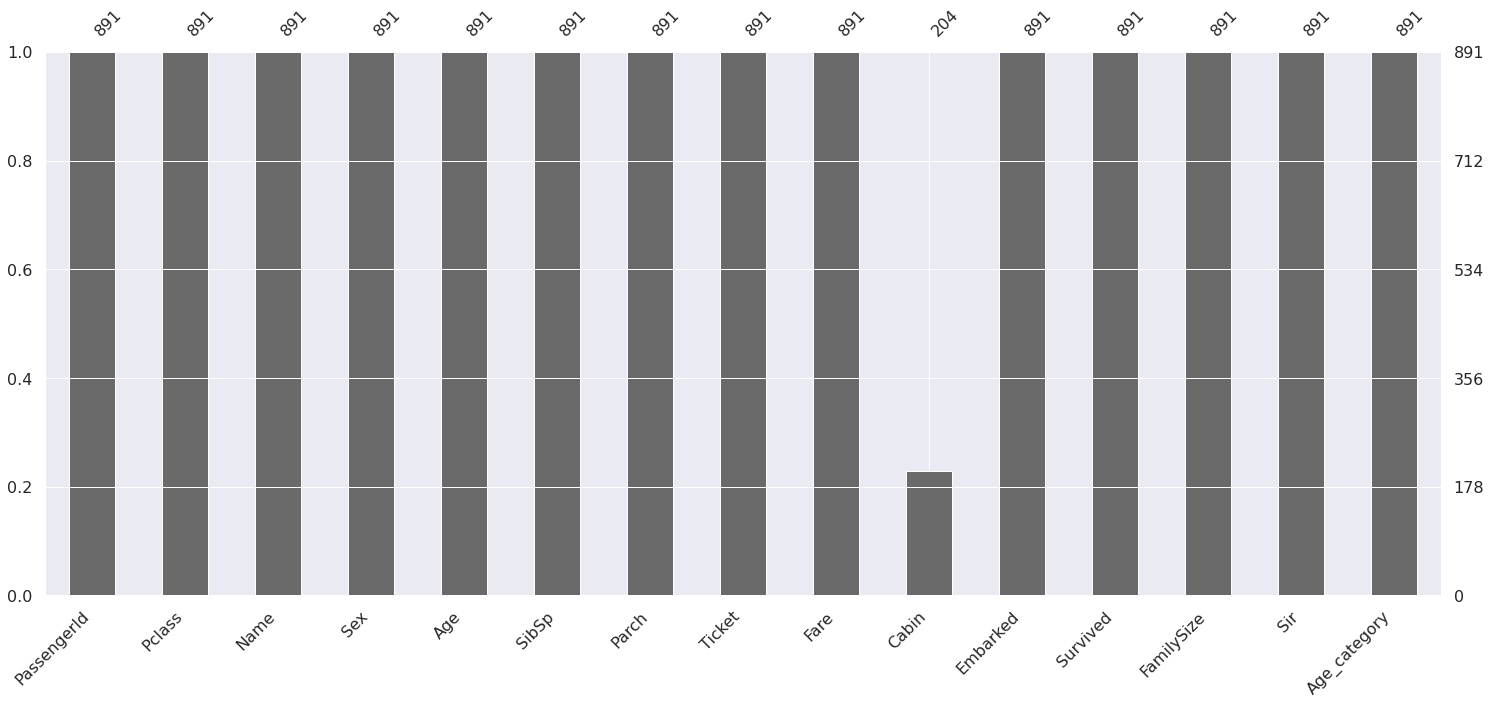

In [0]:
import missingno as msno
#msno.bar는 각 컬럼의 null 이 아닌 데이터의 비율을 그래프로 그려주는 패키지
# df_train.toPandas() : Spark DataFrame인 df_train 을 Pandas DataFrame으로 변환 
msno.bar(df=df_train.toPandas())

In [0]:
from pyspark.ml.feature import StringIndexer

In [0]:
#Sir 칸의 값을 정수로 변환 할 StringIndexer 객체 생성
#StringIndexer(inputCols=[칸이름], outputCols=[정수로 변환한 결과를 저장할 칸 이름])

#Sir칸의 문자열을 정수로 변환해서 Sir_category 컬럼에 저장

string_indexer = StringIndexer(inputCols=["Sir"], outputCols=["Sir_category"])

In [0]:
#Sir칸의 문자열 파악
sir_transformer = string_indexer.fit(df_train)

In [0]:
#Sir 칸 문자열 조회해서 리스트 리턴
# 문자열의 인덱스로 변환 할것임

#Mr->0  Miss-> 1  Mrs -> 2 Master ->3 Other -> 4
sir_transformer.labels

Out[126]: ['Mr', 'Miss', 'Mrs', 'Master', 'Other']

In [0]:
#Sir칸의 문자열을 정수로 변환해서 Sir_category에 저장
sir_transformer.transform(df_train).show()

+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+------------+------------+
|PassengerId|Pclass|                Name|   Sex|              Age|SibSp|Parch|          Ticket|              Fare|Cabin|Embarked|Survived|FamilySize|   Sir|Age_category|Sir_category|
+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+------------+------------+
|          1|     3|Braund, Mr. Owen ...|  male|             22.0|    1|    0|       A/5 21171|2.1102132003465894| null|       S|       0|         2|    Mr|         2.0|         0.0|
|          2|     1|Cumings, Mrs. Joh...|female|             38.0|    1|    0|        PC 17599|   4.2805931204649|  C85|       C|       1|         2|   Mrs|         3.0|         2.0|
|          3|     3|Heikkinen, Miss. ...|female|             26.0|    0|    0|STON/O2

In [0]:
#Sir칸의 문자열을 정수로 변환해서 Sir_category에 저장
df_train = sir_transformer.transform(df_train)

In [0]:

display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir Age_category Sir_category 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2.0 0.0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3.0 2.0 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 2.0 1.0 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 3.0 2.0 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 3.0 0.0 6 3 Moran, Mr. James male 32.65158924205379 0 0 330877 2.246892662898172 null Q 0 1 Mr 3.0 0.0 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 5.0 0.0 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 0.0 3.0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 2.0 2.0 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 1.0 2.0 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 0.0 1.0 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 5.0 1.0 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 2.0 0.0 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 3.0 0.0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 1.0 1.0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 5.0 2.0 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 0.0 3.0 18 2 Williams, Mr. Charles Eugene male 32.65158924205379 0 0 244373 2.639057329615259 null S 1 1 Mr 3.0 0.0 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 3.0 2.0 20 3 Masselmani, Mrs. Fatima female 36.0 0 0 2649 2.1071782966514356 null C 1 1 Mrs 3.0 2.0 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 3.0 0.0 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 3.0 0.0 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 1.0 1.0 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 2.0 0.0 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 0.0 1.0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 3.0 2.0 27 3 Emir, Mr. Farred Chehab male 32.65158924205379 0 0 2631 2.1071782966514356 null C 0 1 Mr 3.0 0.0 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 1.0 0.0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female 21.86 0 0 330959 2.1837114628556327 null Q 1 1 Miss 2.0 1.0 30 3 Todoroff, Mr. Lalio male 32.65158924205379 0 0 349216 2.1855792552411137 null S 0 1 Mr 3.0 0.0 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 4.0 0.0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female 36.0 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 3.0 2.0 33 3 Glynn, Miss. Mary Agatha female 21.86 0 0 335677 2.169053700369523 null Q 1 1 Miss 2.0 1.0 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 6.0 0.0 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 2.0 0.0 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 4.0 0.0 37 3 Mamee, Mr. Hanna male 32.65158924205379 0 0 2677 2.1076888046179385 null C 1 1 Mr 3.0 0.0 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 Mr 2.0 0.0 39 3 Vander Planke, Miss. Augusta Maria female 18.0

In [0]:
%sql
-- 새로 추가된 컬럼이 titanic_view에 적용이 않되있음
select * from titanic_view

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 6 3 Moran, Mr. James male null 0 0 330877 2.246892662898172 null Q 0 1 Mr 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 18 2 Williams, Mr. Charles Eugene male null 0 0 244373 2.639057329615259 null S 1 1 Mr 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 20 3 Masselmani, Mrs. Fatima female null 0 0 2649 2.1071782966514356 null C 1 1 Mrs 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 27 3 Emir, Mr. Farred Chehab male null 0 0 2631 2.1071782966514356 null C 0 1 Mr 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female null 0 0 330959 2.1837114628556327 null Q 1 1 Miss 30 3 Todoroff, Mr. Lalio male null 0 0 349216 2.1855792552411137 null S 0 1 Mr 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female null 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 33 3 Glynn, Miss. Mary Agatha female null 0 0 335677 2.169053700369523 null Q 1 1 Miss 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 37 3 Mamee, Mr. Hanna male null 0 0 2677 2.1076888046179385 null C 1 1 Mr 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 Mr 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 3 Miss 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 2 Miss 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40.0 1 0 7546 2.3489914658082016 null S 0 2 Mrs 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27.0 1 0 11668 3.091042453358316 null S 0 2 Mrs 43 3 Kraeff, Mr. Theodor male null 0 0 3

In [0]:
# 컬럼이 추가 되었으므로 Spark DataFrame을 View(데이터를 추가 수정 할 수 없는 테이블) 
# 형태로 다시 변환
df_train.createOrReplaceTempView('titanic_view')

In [0]:
%sql
-- 새로 추가된 컬럼 Sir_category 가  titanic_view에 추가 되었음
select * from titanic_view

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir Age_category Sir_category 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2.0 0.0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3.0 2.0 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 2.0 1.0 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 3.0 2.0 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 3.0 0.0 6 3 Moran, Mr. James male 32.65158924205379 0 0 330877 2.246892662898172 null Q 0 1 Mr 3.0 0.0 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 5.0 0.0 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 0.0 3.0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 2.0 2.0 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 1.0 2.0 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 0.0 1.0 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 5.0 1.0 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 2.0 0.0 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 3.0 0.0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 1.0 1.0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 5.0 2.0 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 0.0 3.0 18 2 Williams, Mr. Charles Eugene male 32.65158924205379 0 0 244373 2.639057329615259 null S 1 1 Mr 3.0 0.0 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 3.0 2.0 20 3 Masselmani, Mrs. Fatima female 36.0 0 0 2649 2.1071782966514356 null C 1 1 Mrs 3.0 2.0 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 3.0 0.0 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 3.0 0.0 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 1.0 1.0 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 2.0 0.0 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 0.0 1.0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 3.0 2.0 27 3 Emir, Mr. Farred Chehab male 32.65158924205379 0 0 2631 2.1071782966514356 null C 0 1 Mr 3.0 0.0 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 1.0 0.0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female 21.86 0 0 330959 2.1837114628556327 null Q 1 1 Miss 2.0 1.0 30 3 Todoroff, Mr. Lalio male 32.65158924205379 0 0 349216 2.1855792552411137 null S 0 1 Mr 3.0 0.0 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 4.0 0.0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female 36.0 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 3.0 2.0 33 3 Glynn, Miss. Mary Agatha female 21.86 0 0 335677 2.169053700369523 null Q 1 1 Miss 2.0 1.0 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 6.0 0.0 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 2.0 0.0 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 4.0 0.0 37 3 Mamee, Mr. Hanna male 32.65158924205379 0 0 2677 2.1076888046179385 null C 1 1 Mr 3.0 0.0 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 Mr 2.0 0.0 39 3 Vander Planke, Miss. Augusta Maria female 18.0

In [0]:
#Embarked 칸의 값을 정수로 변환 할 StringIndexer 객체 생성
#StringIndexer(inputCols=[칸이름], outputCols=[정수로 변환한 결과를 저장할 칸 이름])

#Embarked 칸의 문자열을 정수로 변환해서 Embarked_category 컬럼에 저장
string_indexer = StringIndexer(inputCols=["Embarked"], outputCols=["Embarked_category"])

In [0]:
#Embarked칸의 문자열 파악
embarked_transformer = string_indexer.fit(df_train)

In [0]:
#Embarked 칸 문자열 조회해서 리스트 리턴
# 문자열의 인덱스로 변환 할것임

#S->0  C-> 1  Q -> 2
embarked_transformer.labels

Out[135]: ['S', 'C', 'Q']

In [0]:
#Embarked 칸의 문자열을 정수로 변환해서 Embarked_category에 저장
embarked_transformer.transform(df_train).show()

+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+------------+------------+-----------------+
|PassengerId|Pclass|                Name|   Sex|              Age|SibSp|Parch|          Ticket|              Fare|Cabin|Embarked|Survived|FamilySize|   Sir|Age_category|Sir_category|Embarked_category|
+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+------------+------------+-----------------+
|          1|     3|Braund, Mr. Owen ...|  male|             22.0|    1|    0|       A/5 21171|2.1102132003465894| null|       S|       0|         2|    Mr|         2.0|         0.0|              0.0|
|          2|     1|Cumings, Mrs. Joh...|female|             38.0|    1|    0|        PC 17599|   4.2805931204649|  C85|       C|       1|         2|   Mrs|         3.0|         2.0|              

In [0]:
#Embarked 칸의 문자열을 정수로 변환해서 Embarked_category에 저장
df_train = embarked_transformer.transform(df_train)

In [0]:
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir Age_category Sir_category Embarked_category 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2.0 0.0 0.0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3.0 2.0 1.0 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 2.0 1.0 0.0 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 3.0 2.0 0.0 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 3.0 0.0 0.0 6 3 Moran, Mr. James male 32.65158924205379 0 0 330877 2.246892662898172 null Q 0 1 Mr 3.0 0.0 2.0 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 5.0 0.0 0.0 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 0.0 3.0 0.0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 2.0 2.0 0.0 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 1.0 2.0 1.0 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 0.0 1.0 0.0 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 5.0 1.0 0.0 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 2.0 0.0 0.0 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 3.0 0.0 0.0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 1.0 1.0 0.0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 5.0 2.0 0.0 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 0.0 3.0 2.0 18 2 Williams, Mr. Charles Eugene male 32.65158924205379 0 0 244373 2.639057329615259 null S 1 1 Mr 3.0 0.0 0.0 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 3.0 2.0 0.0 20 3 Masselmani, Mrs. Fatima female 36.0 0 0 2649 2.1071782966514356 null C 1 1 Mrs 3.0 2.0 1.0 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 3.0 0.0 0.0 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 3.0 0.0 0.0 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 1.0 1.0 2.0 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 2.0 0.0 0.0 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 0.0 1.0 0.0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 3.0 2.0 0.0 27 3 Emir, Mr. Farred Chehab male 32.65158924205379 0 0 2631 2.1071782966514356 null C 0 1 Mr 3.0 0.0 1.0 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 1.0 0.0 0.0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female 21.86 0 0 330959 2.1837114628556327 null Q 1 1 Miss 2.0 1.0 2.0 30 3 Todoroff, Mr. Lalio male 32.65158924205379 0 0 349216 2.1855792552411137 null S 0 1 Mr 3.0 0.0 0.0 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 4.0 0.0 1.0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female 36.0 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 3.0 2.0 1.0 33 3 Glynn, Miss. Mary Agatha female 21.86 0 0 335677 2.169053700369523 null Q 1 1 Miss 2.0 1.0 2.0 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 6.0 0.0 0.0 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 2.0 0.0 1.0 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 4.0 0.0 0.0 37 3 Mamee, Mr. Hanna male 32.65158924205379 0 0 2677 2.1076888046179385 null C 

In [0]:
%sql
-- 새로 추가된 컬럼이 titanic_view에 적용이 않되있음
select * from titanic_view

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir Age_category Sir_category 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2.0 0.0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3.0 2.0 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 2.0 1.0 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 3.0 2.0 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 3.0 0.0 6 3 Moran, Mr. James male 32.65158924205379 0 0 330877 2.246892662898172 null Q 0 1 Mr 3.0 0.0 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 5.0 0.0 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 0.0 3.0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 2.0 2.0 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 1.0 2.0 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 0.0 1.0 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 5.0 1.0 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 2.0 0.0 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 3.0 0.0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 1.0 1.0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 5.0 2.0 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 0.0 3.0 18 2 Williams, Mr. Charles Eugene male 32.65158924205379 0 0 244373 2.639057329615259 null S 1 1 Mr 3.0 0.0 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 3.0 2.0 20 3 Masselmani, Mrs. Fatima female 36.0 0 0 2649 2.1071782966514356 null C 1 1 Mrs 3.0 2.0 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 3.0 0.0 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 3.0 0.0 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 1.0 1.0 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 2.0 0.0 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 0.0 1.0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 3.0 2.0 27 3 Emir, Mr. Farred Chehab male 32.65158924205379 0 0 2631 2.1071782966514356 null C 0 1 Mr 3.0 0.0 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 1.0 0.0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female 21.86 0 0 330959 2.1837114628556327 null Q 1 1 Miss 2.0 1.0 30 3 Todoroff, Mr. Lalio male 32.65158924205379 0 0 349216 2.1855792552411137 null S 0 1 Mr 3.0 0.0 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 4.0 0.0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female 36.0 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 3.0 2.0 33 3 Glynn, Miss. Mary Agatha female 21.86 0 0 335677 2.169053700369523 null Q 1 1 Miss 2.0 1.0 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 6.0 0.0 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 2.0 0.0 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 4.0 0.0 37 3 Mamee, Mr. Hanna male 32.65158924205379 0 0 2677 2.1076888046179385 null C 1 1 Mr 3.0 0.0 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 Mr 2.0 0.0 39 3 Vander Planke, Miss. Augusta Maria female 18.0

In [0]:
# 컬럼이 추가 되었으므로 Spark DataFrame을 View(데이터를 추가 수정 할 수 없는 테이블) 
# 형태로 다시 변환
df_train.createOrReplaceTempView('titanic_view')


In [0]:
%sql
-- 새로 추가된 컬럼 Embarked_category 가  titanic_view에 추가 되었음
select * from titanic_view

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir Age_category Sir_category Embarked_category 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2.0 0.0 0.0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3.0 2.0 1.0 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 2.0 1.0 0.0 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 3.0 2.0 0.0 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 3.0 0.0 0.0 6 3 Moran, Mr. James male 32.65158924205379 0 0 330877 2.246892662898172 null Q 0 1 Mr 3.0 0.0 2.0 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 5.0 0.0 0.0 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 0.0 3.0 0.0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 2.0 2.0 0.0 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 1.0 2.0 1.0 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 0.0 1.0 0.0 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 5.0 1.0 0.0 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 2.0 0.0 0.0 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 3.0 0.0 0.0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 1.0 1.0 0.0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 5.0 2.0 0.0 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 0.0 3.0 2.0 18 2 Williams, Mr. Charles Eugene male 32.65158924205379 0 0 244373 2.639057329615259 null S 1 1 Mr 3.0 0.0 0.0 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 3.0 2.0 0.0 20 3 Masselmani, Mrs. Fatima female 36.0 0 0 2649 2.1071782966514356 null C 1 1 Mrs 3.0 2.0 1.0 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 3.0 0.0 0.0 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 3.0 0.0 0.0 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 1.0 1.0 2.0 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 2.0 0.0 0.0 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 0.0 1.0 0.0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 3.0 2.0 0.0 27 3 Emir, Mr. Farred Chehab male 32.65158924205379 0 0 2631 2.1071782966514356 null C 0 1 Mr 3.0 0.0 1.0 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 1.0 0.0 0.0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female 21.86 0 0 330959 2.1837114628556327 null Q 1 1 Miss 2.0 1.0 2.0 30 3 Todoroff, Mr. Lalio male 32.65158924205379 0 0 349216 2.1855792552411137 null S 0 1 Mr 3.0 0.0 0.0 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 4.0 0.0 1.0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female 36.0 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 3.0 2.0 1.0 33 3 Glynn, Miss. Mary Agatha female 21.86 0 0 335677 2.169053700369523 null Q 1 1 Miss 2.0 1.0 2.0 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 6.0 0.0 0.0 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 2.0 0.0 1.0 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 4.0 0.0 0.0 37 3 Mamee, Mr. Hanna male 32.65158924205379 0 0 2677 2.1076888046179385 null C 

In [0]:
#Sex 칸의 값을 정수로 변환 할 StringIndexer 객체 생성
#StringIndexer(inputCols=[칸이름], outputCols=[정수로 변환한 결과를 저장할 칸 이름])

#Sex 칸의 문자열을 정수로 변환해서 Sex_category 컬럼에 저장
string_indexer = StringIndexer(inputCols=["Sex"], outputCols=["Sex_category"])

In [0]:
#Sex 칸의 문자열 파악
sex_transformer = string_indexer.fit(df_train)

In [0]:
#Embarked 칸 문자열 조회해서 리스트 리턴
# 문자열의 인덱스로 변환 할것임

# male->0  femal-> 1 

sex_transformer.labels

Out[144]: ['male', 'female']

In [0]:

#Sex 칸의 문자열을 정수로 변환해서 Sex_category에 저장
sex_transformer.transform(df_train).show()

+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+------------+------------+-----------------+------------+
|PassengerId|Pclass|                Name|   Sex|              Age|SibSp|Parch|          Ticket|              Fare|Cabin|Embarked|Survived|FamilySize|   Sir|Age_category|Sir_category|Embarked_category|Sex_category|
+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+------------+------------+-----------------+------------+
|          1|     3|Braund, Mr. Owen ...|  male|             22.0|    1|    0|       A/5 21171|2.1102132003465894| null|       S|       0|         2|    Mr|         2.0|         0.0|              0.0|         0.0|
|          2|     1|Cumings, Mrs. Joh...|female|             38.0|    1|    0|        PC 17599|   4.2805931204649|  C85|       C|       1|      

In [0]:
#Sex 칸의 문자열을 정수로 변환해서 Sex_category에 저장
df_train = sex_transformer.transform(df_train)

In [0]:
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir Age_category Sir_category Embarked_category Sex_category 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2.0 0.0 0.0 0.0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3.0 2.0 1.0 1.0 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 2.0 1.0 0.0 1.0 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 3.0 2.0 0.0 1.0 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 3.0 0.0 0.0 0.0 6 3 Moran, Mr. James male 32.65158924205379 0 0 330877 2.246892662898172 null Q 0 1 Mr 3.0 0.0 2.0 0.0 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 5.0 0.0 0.0 0.0 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 0.0 3.0 0.0 0.0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 2.0 2.0 0.0 1.0 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 1.0 2.0 1.0 1.0 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 0.0 1.0 0.0 1.0 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 5.0 1.0 0.0 1.0 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 2.0 0.0 0.0 0.0 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 3.0 0.0 0.0 0.0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 1.0 1.0 0.0 1.0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 5.0 2.0 0.0 1.0 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 0.0 3.0 2.0 0.0 18 2 Williams, Mr. Charles Eugene male 32.65158924205379 0 0 244373 2.639057329615259 null S 1 1 Mr 3.0 0.0 0.0 0.0 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 3.0 2.0 0.0 1.0 20 3 Masselmani, Mrs. Fatima female 36.0 0 0 2649 2.1071782966514356 null C 1 1 Mrs 3.0 2.0 1.0 1.0 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 3.0 0.0 0.0 0.0 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 3.0 0.0 0.0 0.0 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 1.0 1.0 2.0 1.0 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 2.0 0.0 0.0 0.0 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 0.0 1.0 0.0 1.0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 3.0 2.0 0.0 1.0 27 3 Emir, Mr. Farred Chehab male 32.65158924205379 0 0 2631 2.1071782966514356 null C 0 1 Mr 3.0 0.0 1.0 0.0 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 1.0 0.0 0.0 0.0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female 21.86 0 0 330959 2.1837114628556327 null Q 1 1 Miss 2.0 1.0 2.0 1.0 30 3 Todoroff, Mr. Lalio male 32.65158924205379 0 0 349216 2.1855792552411137 null S 0 1 Mr 3.0 0.0 0.0 0.0 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 4.0 0.0 1.0 0.0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female 36.0 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 3.0 2.0 1.0 1.0 33 3 Glynn, Miss. Mary Agatha female 21.86 0 0 335677 2.169053700369523 null Q 1 1 Miss 2.0 1.0 2.0 1.0 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 6.0 0.0 0.0 0.0 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 2.0 0.0 1.0 0.0 36 1 Holverson, Mr. Alexande

In [0]:
%sql
-- 새로 추가된 컬럼이 titanic_view에 적용이 않되있음
select * from titanic_view

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir Age_category Sir_category Embarked_category 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2.0 0.0 0.0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3.0 2.0 1.0 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 2.0 1.0 0.0 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 3.0 2.0 0.0 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 3.0 0.0 0.0 6 3 Moran, Mr. James male 32.65158924205379 0 0 330877 2.246892662898172 null Q 0 1 Mr 3.0 0.0 2.0 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 5.0 0.0 0.0 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 0.0 3.0 0.0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 2.0 2.0 0.0 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 1.0 2.0 1.0 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 0.0 1.0 0.0 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 5.0 1.0 0.0 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 2.0 0.0 0.0 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 3.0 0.0 0.0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 1.0 1.0 0.0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 5.0 2.0 0.0 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 0.0 3.0 2.0 18 2 Williams, Mr. Charles Eugene male 32.65158924205379 0 0 244373 2.639057329615259 null S 1 1 Mr 3.0 0.0 0.0 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 3.0 2.0 0.0 20 3 Masselmani, Mrs. Fatima female 36.0 0 0 2649 2.1071782966514356 null C 1 1 Mrs 3.0 2.0 1.0 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 3.0 0.0 0.0 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 3.0 0.0 0.0 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 1.0 1.0 2.0 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 2.0 0.0 0.0 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 0.0 1.0 0.0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 3.0 2.0 0.0 27 3 Emir, Mr. Farred Chehab male 32.65158924205379 0 0 2631 2.1071782966514356 null C 0 1 Mr 3.0 0.0 1.0 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 1.0 0.0 0.0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female 21.86 0 0 330959 2.1837114628556327 null Q 1 1 Miss 2.0 1.0 2.0 30 3 Todoroff, Mr. Lalio male 32.65158924205379 0 0 349216 2.1855792552411137 null S 0 1 Mr 3.0 0.0 0.0 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 4.0 0.0 1.0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female 36.0 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 3.0 2.0 1.0 33 3 Glynn, Miss. Mary Agatha female 21.86 0 0 335677 2.169053700369523 null Q 1 1 Miss 2.0 1.0 2.0 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 6.0 0.0 0.0 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 2.0 0.0 1.0 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 4.0 0.0 0.0 37 3 Mamee, Mr. Hanna male 32.65158924205379 0 0 2677 2.1076888046179385 null C 

In [0]:
# 컬럼이 추가 되었으므로 Spark DataFrame을 View(데이터를 추가 수정 할 수 없는 테이블) 
# 형태로 다시 변환
df_train.createOrReplaceTempView('titanic_view')

In [0]:
%sql
-- 새로 추가된 컬럼 Sex_category 가  titanic_view에 추가 되었음
select * from titanic_view

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir Age_category Sir_category Embarked_category Sex_category 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2.0 0.0 0.0 0.0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3.0 2.0 1.0 1.0 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 2.0 1.0 0.0 1.0 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 3.0 2.0 0.0 1.0 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 3.0 0.0 0.0 0.0 6 3 Moran, Mr. James male 32.65158924205379 0 0 330877 2.246892662898172 null Q 0 1 Mr 3.0 0.0 2.0 0.0 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 5.0 0.0 0.0 0.0 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 0.0 3.0 0.0 0.0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 2.0 2.0 0.0 1.0 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 1.0 2.0 1.0 1.0 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 0.0 1.0 0.0 1.0 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 5.0 1.0 0.0 1.0 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 2.0 0.0 0.0 0.0 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 3.0 0.0 0.0 0.0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 1.0 1.0 0.0 1.0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 5.0 2.0 0.0 1.0 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 0.0 3.0 2.0 0.0 18 2 Williams, Mr. Charles Eugene male 32.65158924205379 0 0 244373 2.639057329615259 null S 1 1 Mr 3.0 0.0 0.0 0.0 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 3.0 2.0 0.0 1.0 20 3 Masselmani, Mrs. Fatima female 36.0 0 0 2649 2.1071782966514356 null C 1 1 Mrs 3.0 2.0 1.0 1.0 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 3.0 0.0 0.0 0.0 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 3.0 0.0 0.0 0.0 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 1.0 1.0 2.0 1.0 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 2.0 0.0 0.0 0.0 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 0.0 1.0 0.0 1.0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 3.0 2.0 0.0 1.0 27 3 Emir, Mr. Farred Chehab male 32.65158924205379 0 0 2631 2.1071782966514356 null C 0 1 Mr 3.0 0.0 1.0 0.0 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 1.0 0.0 0.0 0.0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female 21.86 0 0 330959 2.1837114628556327 null Q 1 1 Miss 2.0 1.0 2.0 1.0 30 3 Todoroff, Mr. Lalio male 32.65158924205379 0 0 349216 2.1855792552411137 null S 0 1 Mr 3.0 0.0 0.0 0.0 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 4.0 0.0 1.0 0.0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female 36.0 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 3.0 2.0 1.0 1.0 33 3 Glynn, Miss. Mary Agatha female 21.86 0 0 335677 2.169053700369523 null Q 1 1 Miss 2.0 1.0 2.0 1.0 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 6.0 0.0 0.0 0.0 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 2.0 0.0 1.0 0.0 36 1 Holverson, Mr. Alexande